<img align="left" src = https://dirac.astro.washington.edu/wp-content/uploads/2022/03/DIRAC_logo-purple-text_transparent-bckg_ALPHA-1-1.png
 width=190 style="padding: 10px">
<br><b>Modeling White Dwarf / M Dwarf Binary Systems</b> <br>
Contact author: Bob Abel, Željko Ivezić <br>
Last verified to run: 2023-08-21 <br>
LSST Science Piplines version: Weekly 2023_21 <br>
Container size: medium <br>
<br><br>
### &ensp;&ensp;&ensp;&ensp;&ensp;DiRAC Institute</b>


## TABLE OF CONTENTS
### I. Introduction
### II. Import Modules and Data, Create an Index for 0.1 Mag Increments
### III. Calculate Fluxes Based on the Magnitudes and Colors
### IVa. Calculate $M_{r}$ and Colors for a DA/MD Halo Binary System
### IVb. Calculate $M_{r}$ and Colors for a DA/MD Disk Binary System
### IVc. Calculate $M_{r}$ and Colors for a DB/MD Halo Binary System
### IVd. Calculate $M_{r}$ and Colors for a DB/MD Disk Binary System
### IVe. Calculate $M_{r}$ and Colors for a DC/MD Halo Binary System
### IVf. Calculate $M_{r}$ and Colors for a DC/MD Disk Binary System
### V. Compare Colors for Each Type of Binary System
### VI. Compare Color-Magnitude Plots for Each Type of Binary System
### VII. Save df_WDMD2 to WDMD2.csv


### I. Introduction
This code imports the pandas df_WDMD DataFrame ("WDMD.csv") from Gaia_Mont_WarWD3.ipynb, which consists of absolute r-band magnitudes ($M_{r}$) and SDSS colors for white dwarf (WD) stars and M dwarf (MD) stars. The white dwarf data are obtained from the [Montreal White Dwarf Database](https://ui.adsabs.harvard.edu/abs/2017ASPC..509....3D/abstracthttps://ui.adsabs.harvard.edu/abs/2017ASPC..509....3D/abstract), the [Warwick Database](https://arxiv.org/abs/2106.07669https://arxiv.org/abs/2106.07669) and [Gaia photogeometric parallaxes](https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=J/MNRAS/508/3877/maincat). $Log_{10}$(g) values were very similar for the H- and He-dominated WD atmospheres, so we used the Montreal and Warwick spectroscopicaly identified DA, DB and DC categories. The M dwarf data, obtained from Ivezić, includes [Fe/H] values, from which we extract disk ([FeH]=0.0) and halo ([FeH]=-1.5) categories.  8.5 ≤ $M_{r}$ ≤ 14.5 for WD's and MD's, as they both have the same range in a Herzsprung-Russell diagram. Values are given in 0.02 mag increments (301 rows). We calculate fluxes of each type of star based on $M_{r}$ and colors, then combine the fluxes over the range of WD/MD magnitudes and convert back to magnitudes to simulate white dwarf/M dwarf binary systems. Combined magnitudes and colors are calculated for for DA/halo, DA/disk, DB/halo, DB/disk, DC/halo, and DC/disk combinations. We use $\Delta$$M_{r}$ = 0.1 mag - that's 3600 rows of data for each of the 6 categories. The result is df_WDMD2 pandas DataFrame, which is saved as a .csv file (WDMD2.csv).

### II. Import Modules and Data, Create an Index for 0.1 Mag Increments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps

# cmap = colormaps['gist_ncar']
cmap = colormaps['jet']

filter = ['u', 'g', 'r', 'i', 'z']


In [2]:
df_WDMD = pd.read_csv("WDMD.csv")

In [3]:
df_WDMD.columns

Index(['Mr', 'DAug', 'DAgr', 'DAri', 'DAiz', 'DBug', 'DBgr', 'DBri', 'DBiz',
       'DCug', 'DCgr', 'DCri', 'DCiz', 'FeH_disk', 'ug_disk', 'gr_disk',
       'ri_disk', 'iz_disk', 'FeH_halo', 'ug_halo', 'gr_halo', 'ri_halo',
       'iz_halo'],
      dtype='object')

In [4]:
df_WDMD.head()

Mr      DAug      DAgr      DAri      DAiz      DBug      DBgr      DBri   
0  8.50 -0.520713 -0.780986 -0.535645 -0.719420 -0.621256 -0.798147 -0.572696  \
1  8.52 -0.518480 -0.777961 -0.533949 -0.715412 -0.617526 -0.794751 -0.570443   
2  8.54 -0.516231 -0.774932 -0.532251 -0.711426 -0.613795 -0.791355 -0.568190   
3  8.56 -0.513967 -0.771899 -0.530549 -0.707459 -0.610064 -0.787959 -0.565937   
4  8.58 -0.511687 -0.768861 -0.528844 -0.703513 -0.606334 -0.784563 -0.563683   

       DBiz      DCug  ...  FeH_disk  ug_disk  gr_disk  ri_disk  iz_disk   
0 -0.844993 -1.067288  ...       0.0   2.5545   1.3796   0.7599   0.3761  \
1 -0.840852 -1.061358  ...       0.0   2.5543   1.3803   0.7650   0.3790   
2 -0.836712 -1.055428  ...       0.0   2.5542   1.3809   0.7701   0.3817   
3 -0.832571 -1.049498  ...       0.0   2.5540   1.3816   0.7752   0.3845   
4 -0.828431 -1.043568  ...       0.0   2.5538   1.3822   0.7803   0.3874   

   FeH_halo  ug_halo  gr_halo  ri_halo  iz_halo  
0      -1.5   2.4348   1.2202   0.4984   0.2427  
1      -1.5   2.4368   1.2247   0.5018   0.2447  
2      -1.5   2.4386   1.2291   0.5052   0.2467  
3      -1.5   2.4404   1.2334   0.5087   0.2486  
4      -1.5   2.4420   1.2377   0.5122   0.2506  

[5 rows x 23 columns]

In [5]:
r_index = []
for i in range(61):
    r_index.append(i*5)
# print(r_index)
# for i in r_index:
#     print('%.2f' %df_WDMD['Mr'][i])

### III. Calculate Fluxes Based on the Magnitudes and Colors

In [6]:
# Calculate Fluxes for the five categories of stars.

# Fluxes for DA White Dwarfs:
df_WDMD['DA_rflux'] = 10**(0.4*(31.4 - df_WDMD['Mr']))
df_WDMD['DA_gflux'] = df_WDMD['DA_rflux']  * 10**(-0.4 * (df_WDMD['DAgr']))
df_WDMD['DA_uflux'] = df_WDMD['DA_rflux']  * 10**(-0.4 * (df_WDMD['DAug'] + df_WDMD['DAgr']))
df_WDMD['DA_iflux'] = df_WDMD['DA_rflux']  * 10**(0.4 * df_WDMD['DAri'])
df_WDMD['DA_zflux'] = df_WDMD['DA_rflux']  * 10**(0.4 * (df_WDMD['DAri'] + df_WDMD['DAiz'])) 
# Fluxes for DB White Dwarfs:
df_WDMD['DB_rflux'] = 10**(0.4*(31.4 - df_WDMD['Mr']))
df_WDMD['DB_gflux'] = df_WDMD['DB_rflux']  * 10**(-0.4 * (df_WDMD['DBgr']))
df_WDMD['DB_uflux'] = df_WDMD['DB_rflux']  * 10**(-0.4 * (df_WDMD['DBug'] + df_WDMD['DBgr']))
df_WDMD['DB_iflux'] = df_WDMD['DB_rflux']  * 10**(0.4 * df_WDMD['DBri'])
df_WDMD['DB_zflux'] = df_WDMD['DB_rflux']  * 10**(0.4 * (df_WDMD['DBri'] + df_WDMD['DBiz'])) 
# Fluxes for DC White Dwarfs:
df_WDMD['DC_rflux'] = 10**(0.4*(31.4 - df_WDMD['Mr']))
df_WDMD['DC_gflux'] = df_WDMD['DC_rflux']  * 10**(-0.4 * (df_WDMD['DCgr']))
df_WDMD['DC_uflux'] = df_WDMD['DC_rflux']  * 10**(-0.4 * (df_WDMD['DCug'] + df_WDMD['DCgr']))
df_WDMD['DC_iflux'] = df_WDMD['DC_rflux']  * 10**(0.4 * df_WDMD['DCri'])
df_WDMD['DC_zflux'] = df_WDMD['DC_rflux']  * 10**(0.4 * (df_WDMD['DCri'] + df_WDMD['DCiz'])) 
# Fluxes for halo M Dwarfs:
df_WDMD['Mh_rflux'] = 10**(0.4*(31.4 - df_WDMD['Mr']))
df_WDMD['Mh_gflux'] = df_WDMD['Mh_rflux'] * 10**(-0.4 * df_WDMD['gr_halo'])
df_WDMD['Mh_uflux'] = df_WDMD['Mh_rflux'] * 10**(-0.4 * (df_WDMD['ug_halo'] + df_WDMD['gr_halo']))
df_WDMD['Mh_iflux'] = df_WDMD['Mh_rflux'] * 10**(0.4 * df_WDMD['ri_halo'])
df_WDMD['Mh_zflux'] = df_WDMD['Mh_rflux'] * 10**(0.4 * (df_WDMD['ri_halo'] + df_WDMD['iz_halo']))
# Fluxes for disk M Dwarfs:
df_WDMD['Md_rflux'] = 10**(0.4*(31.4 - df_WDMD['Mr']))
df_WDMD['Md_gflux'] = df_WDMD['Md_rflux'] * 10**(-0.4 * df_WDMD['gr_disk'])
df_WDMD['Md_uflux'] = df_WDMD['Md_rflux'] * 10**(-0.4 * (df_WDMD['ug_disk'] + df_WDMD['gr_disk']))
df_WDMD['Md_iflux'] = df_WDMD['Md_rflux'] * 10**(0.4 * df_WDMD['ri_disk'])
df_WDMD['Md_zflux'] = df_WDMD['Md_rflux'] * 10**(0.4 * (df_WDMD['ri_disk'] + df_WDMD['iz_disk']))


#### Loop over $M_{r}$ = 8.5-14.5 for the M dwarfs for each value of $M_{r}$ for the White Dwarfs, from 8.5 to 14.5, in 0.1 $\Delta$$M_{r}$ increments.

### IVa. Calculate $M_{r}$ and Colors for a DA/MD Halo Binary System.

In [7]:
# DA White Dwarfs in the halo:
DAh_rfratio = []
DAh_Mr = []
DAh_ug = []
DAh_gr = []
DAh_ri = []
DAh_iz = []
DAh_deltaMr = []
for i in r_index:
    for j in r_index:
        DAh_uflux = df_WDMD['DA_uflux'][i] + df_WDMD['Mh_uflux'][j]
        DAh_gflux = df_WDMD['DA_gflux'][i] + df_WDMD['Mh_gflux'][j]
        DAh_rflux = df_WDMD['DA_rflux'][i] + df_WDMD['Mh_rflux'][j]
        DAh_iflux = df_WDMD['DA_iflux'][i] + df_WDMD['Mh_iflux'][j]
        DAh_zflux = df_WDMD['DA_zflux'][i] + df_WDMD['Mh_zflux'][j]
        DAh_rfratio.append(df_WDMD['DA_rflux'][i] / df_WDMD['Mh_rflux'][j])
        DAh_Mu = -2.5 * np.log10(DAh_uflux) + 31.4
        DAh_Mg = -2.5 * np.log10(DAh_gflux) + 31.4
        DAh_Mi = -2.5 * np.log10(DAh_iflux) + 31.4
        DAh_Mz = -2.5 * np.log10(DAh_zflux) + 31.4
        DAh_Mr_temp = (-2.5 * np.log10(DAh_rflux) + 31.4)
        DAh_Mr.append(DAh_Mr_temp)
        DAh_ug.append(DAh_Mu - DAh_Mg)
        DAh_gr.append(DAh_Mg - DAh_Mr_temp)
        DAh_ri.append(DAh_Mr_temp - DAh_Mi)
        DAh_iz.append(DAh_Mi - DAh_Mz)
        DAh_deltaMr.append(df_WDMD['Mr'][i] - df_WDMD['Mr'][j])


Text(0.5, 1.0, '$L_{WD}$/$L_{MDhalo}$ vs Abs. Mag.')

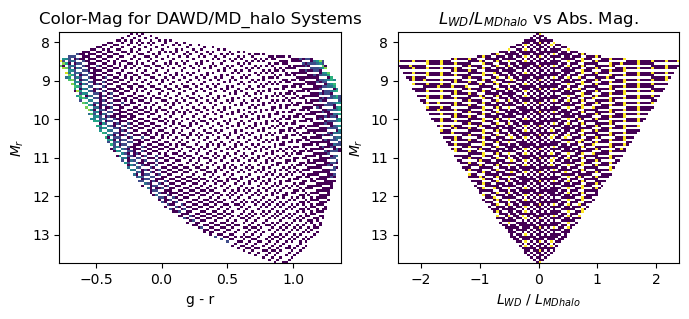

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))
ax[0].hist2d(DAh_gr, DAh_Mr, bins=100, norm='log')
ax[0].set_xlabel('g - r')
ax[0].set_ylabel('$M_{r}$')
ax[0].invert_yaxis()
ax[0].set_title('Color-Mag for DAWD/MD_halo Systems')

ax[1].hist2d(np.log10(DAh_rfratio), DAh_Mr, bins=100, norm='log')
ax[1].set_xlabel('$L_{WD}$ / $L_{MDhalo}$')
ax[1].set_ylabel('$M_{r}$')
ax[1].invert_yaxis()
ax[1].set_title('$L_{WD}$/$L_{MDhalo}$ vs Abs. Mag.')


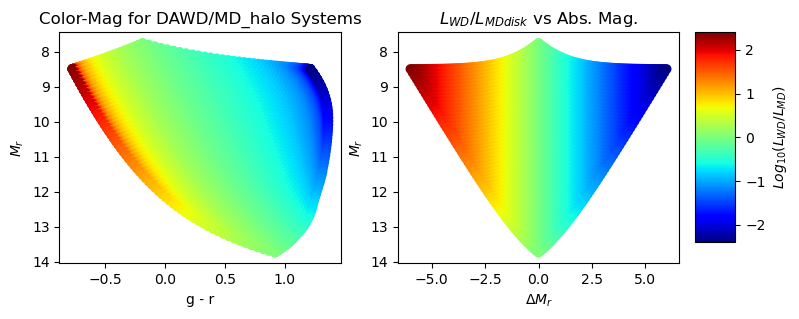

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))

im = ax[0].scatter(DAh_gr, DAh_Mr, c=np.log10(DAh_rfratio), 
                       cmap=cmap)
ax[0].set_xlabel('g - r')
ax[0].set_ylabel('$M_{r}$')
ax[0].invert_yaxis()
ax[0].set_title('Color-Mag for DAWD/MD_halo Systems')
 
im = ax[1].scatter(DAh_deltaMr, DAh_Mr, c=np.log10(DAh_rfratio), 
                       cmap=cmap)
ax[1].set_xlabel('$\Delta$$M_{r}$')
ax[1].set_ylabel('$M_{r}$')
ax[1].invert_yaxis()
ax[1].set_title('$L_{WD}$/$L_{MDdisk}$ vs Abs. Mag.')
 
cbar_ax = fig.add_axes([0.92, 0.18, 0.05, 0.7])
plt.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$)')


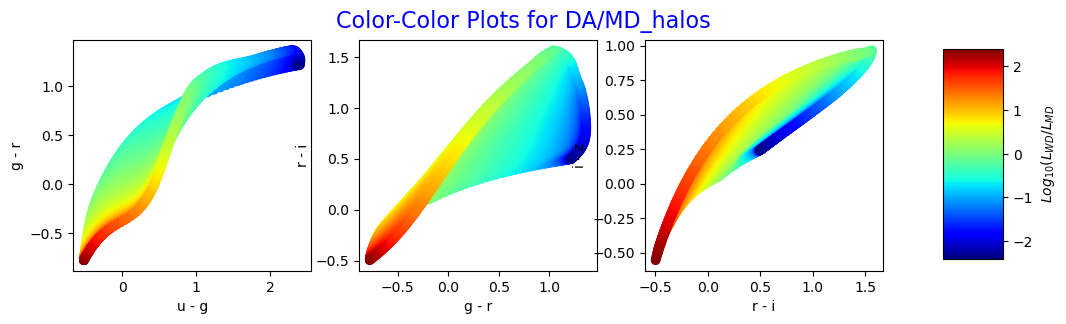

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

im = ax[0].scatter(DAh_ug, DAh_gr, c=np.log10(DAh_rfratio), 
                       cmap=cmap)
ax[0].set_xlabel('u - g')
ax[0].set_ylabel('g - r')

im = ax[1].scatter(DAh_gr, DAh_ri, c=np.log10(DAh_rfratio), 
                       cmap=cmap)
ax[1].set_xlabel('g - r')
ax[1].set_ylabel('r - i')

im = ax[2].scatter(DAh_ri, DAh_iz, c=np.log10(DAh_rfratio), 
                       cmap=cmap)
ax[2].set_xlabel('r - i')
ax[2].set_ylabel('i - z')
    
fig.suptitle('Color-Color Plots for DA/MD_halos', fontsize=16, color='blue')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


In [11]:
df_WDMD2 = pd.DataFrame()
df_WDMD2['DAh_rfratio'] = DAh_rfratio
df_WDMD2['DAh_Mr'] = DAh_Mr
df_WDMD2['DAh_ug'] = DAh_ug
df_WDMD2['DAh_gr'] = DAh_gr
df_WDMD2['DAh_ri'] = DAh_ri
df_WDMD2['DAh_iz'] = DAh_iz
df_WDMD2['DAh_deltaMr'] = DAh_deltaMr
del DAh_rfratio
del DAh_Mr
del DAh_ug
del DAh_gr
del DAh_ri
del DAh_iz
del DAh_deltaMr

#### IVb. Calculate $M_{r}$ and Colors for a DA/MD Disk Binary System.

In [12]:
# DA White Dwarfs in the disk:
DAd_rfratio = []
DAd_Mr = []
DAd_ug = []
DAd_gr = []
DAd_ri = []
DAd_iz = []
DAd_deltaMr = []
for i in r_index:
    for j in r_index:
        DAd_uflux = df_WDMD['DA_uflux'][i] + df_WDMD['Md_uflux'][j]
        DAd_gflux = df_WDMD['DA_gflux'][i] + df_WDMD['Md_gflux'][j]
        DAd_rflux = df_WDMD['DA_rflux'][i] + df_WDMD['Md_rflux'][j]
        DAd_iflux = df_WDMD['DA_iflux'][i] + df_WDMD['Md_iflux'][j]
        DAd_zflux = df_WDMD['DA_zflux'][i] + df_WDMD['Md_zflux'][j]
        DAd_rfratio.append(df_WDMD['DA_rflux'][i] / df_WDMD['Md_rflux'][j])
        DAd_Mu = -2.5 * np.log10(DAd_uflux) + 31.4
        DAd_Mg = -2.5 * np.log10(DAd_gflux) + 31.4
        DAd_Mi = -2.5 * np.log10(DAd_iflux) + 31.4
        DAd_Mz = -2.5 * np.log10(DAd_zflux) + 31.4
        DAd_Mr_temp = (-2.5 * np.log10(DAd_rflux) + 31.4)
        DAd_Mr.append(DAd_Mr_temp)
        DAd_ug.append(DAd_Mu - DAd_Mg)
        DAd_gr.append(DAd_Mg - DAd_Mr_temp)
        DAd_ri.append(DAd_Mr_temp - DAd_Mi)
        DAd_iz.append(DAd_Mi - DAd_Mz)
        DAd_deltaMr.append(df_WDMD['Mr'][i] - df_WDMD['Mr'][j])


Text(0.5, 1.0, '$L_{WD}$/$L_{MDdisk}$ vs Abs. Mag.')

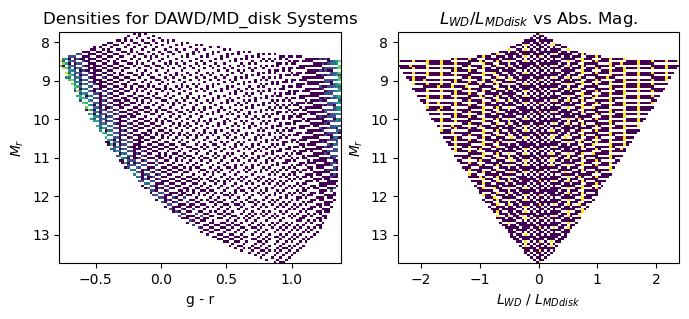

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))
ax[0].hist2d(DAd_gr, DAd_Mr, bins=100, norm='log')
ax[0].set_xlabel('g - r')
ax[0].set_ylabel('$M_{r}$')
ax[0].invert_yaxis()
ax[0].set_title('Densities for DAWD/MD_disk Systems')

ax[1].hist2d(np.log10(DAd_rfratio), DAd_Mr, bins=100, norm='log')
ax[1].set_xlabel('$L_{WD}$ / $L_{MDdisk}$')
ax[1].set_ylabel('$M_{r}$')
ax[1].invert_yaxis()
ax[1].set_title('$L_{WD}$/$L_{MDdisk}$ vs Abs. Mag.')


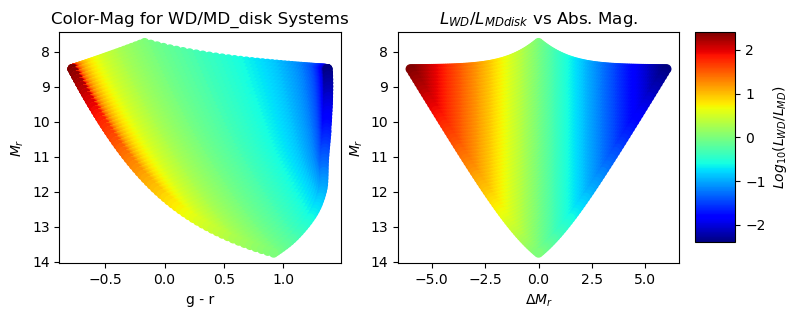

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))

im = ax[0].scatter(DAd_gr, DAd_Mr, c=np.log10(DAd_rfratio), 
                       cmap=cmap)
ax[0].set_xlabel('g - r')
ax[0].set_ylabel('$M_{r}$')
ax[0].invert_yaxis()
ax[0].set_title('Color-Mag for WD/MD_disk Systems')
 
im = ax[1].scatter(DAd_deltaMr, DAd_Mr, c=np.log10(DAd_rfratio), 
                       cmap=cmap)
ax[1].set_xlabel('$\Delta$$M_{r}$')
ax[1].set_ylabel('$M_{r}$')
ax[1].invert_yaxis()
ax[1].set_title('$L_{WD}$/$L_{MDdisk}$ vs Abs. Mag.')
 
cbar_ax = fig.add_axes([0.92, 0.18, 0.05, 0.7])
plt.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$)')


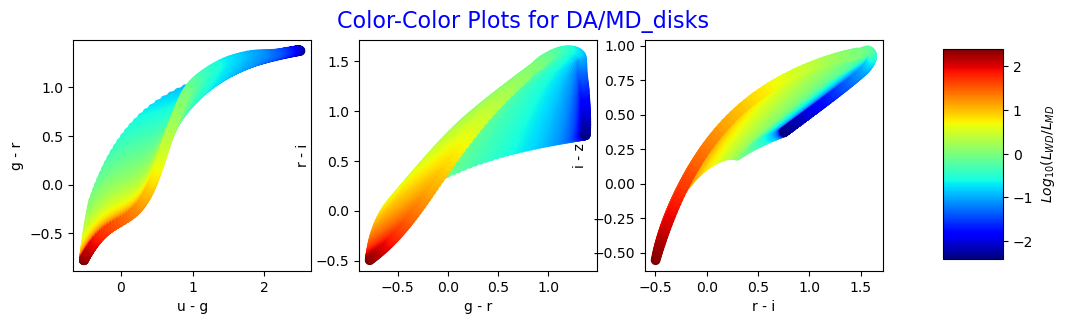

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

im = ax[0].scatter(DAd_ug, DAd_gr, c=np.log10(DAd_rfratio), 
                       cmap=cmap)
ax[0].set_xlabel('u - g')
ax[0].set_ylabel('g - r')

im = ax[1].scatter(DAd_gr, DAd_ri, c=np.log10(DAd_rfratio), 
                       cmap=cmap)
ax[1].set_xlabel('g - r')
ax[1].set_ylabel('r - i')

im = ax[2].scatter(DAd_ri, DAd_iz, c=np.log10(DAd_rfratio), 
                       cmap=cmap)
ax[2].set_xlabel('r - i')
ax[2].set_ylabel('i - z')
    
fig.suptitle('Color-Color Plots for DA/MD_disks', fontsize=16, color='blue')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


In [16]:
df_WDMD2['DAd_rfratio'] = DAd_rfratio
df_WDMD2['DAd_Mr'] = DAd_Mr
df_WDMD2['DAd_ug'] = DAd_ug
df_WDMD2['DAd_gr'] = DAd_gr
df_WDMD2['DAd_ri'] = DAd_ri
df_WDMD2['DAd_iz'] = DAd_iz
df_WDMD2['DAd_deltaMr'] = DAd_deltaMr
del DAd_rfratio
del DAd_Mr
del DAd_ug
del DAd_gr
del DAd_ri
del DAd_iz
del DAd_deltaMr

### IVc. Calculate $M_{r}$ and Colors for a DB/MD Halo Binary System.

In [17]:
# DA White Dwarfs in the halo:
DBh_rfratio = []
DBh_Mr = []
DBh_ug = []
DBh_gr = []
DBh_ri = []
DBh_iz = []
DBh_deltaMr = []
for i in r_index:
    for j in r_index:
        DBh_uflux = df_WDMD['DB_uflux'][i] + df_WDMD['Mh_uflux'][j]
        DBh_gflux = df_WDMD['DB_gflux'][i] + df_WDMD['Mh_gflux'][j]
        DBh_rflux = df_WDMD['DB_rflux'][i] + df_WDMD['Mh_rflux'][j]
        DBh_iflux = df_WDMD['DB_iflux'][i] + df_WDMD['Mh_iflux'][j]
        DBh_zflux = df_WDMD['DB_zflux'][i] + df_WDMD['Mh_zflux'][j]
        DBh_rfratio.append(df_WDMD['DB_rflux'][i] / df_WDMD['Mh_rflux'][j])
        DBh_Mu = -2.5 * np.log10(DBh_uflux) + 31.4
        DBh_Mg = -2.5 * np.log10(DBh_gflux) + 31.4
        DBh_Mi = -2.5 * np.log10(DBh_iflux) + 31.4
        DBh_Mz = -2.5 * np.log10(DBh_zflux) + 31.4
        DBh_Mr_temp = (-2.5 * np.log10(DBh_rflux) + 31.4)
        DBh_Mr.append(DBh_Mr_temp)
        DBh_ug.append(DBh_Mu - DBh_Mg)
        DBh_gr.append(DBh_Mg - DBh_Mr_temp)
        DBh_ri.append(DBh_Mr_temp - DBh_Mi)
        DBh_iz.append(DBh_Mi - DBh_Mz)
        DBh_deltaMr.append(df_WDMD['Mr'][i] - df_WDMD['Mr'][j])


Text(0.5, 1.0, '$L_{WD}$/$L_{MDhalo}$ vs Abs. Mag.')

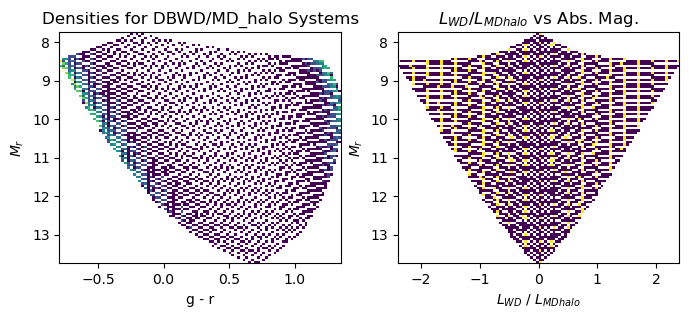

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))
ax[0].hist2d(DBh_gr, DBh_Mr, bins=100, norm='log')
ax[0].set_xlabel('g - r')
ax[0].set_ylabel('$M_{r}$')
ax[0].invert_yaxis()
ax[0].set_title('Densities for DBWD/MD_halo Systems')

ax[1].hist2d(np.log10(DBh_rfratio), DBh_Mr, bins=100, norm='log')
ax[1].set_xlabel('$L_{WD}$ / $L_{MDhalo}$')
ax[1].set_ylabel('$M_{r}$')
ax[1].invert_yaxis()
ax[1].set_title('$L_{WD}$/$L_{MDhalo}$ vs Abs. Mag.')


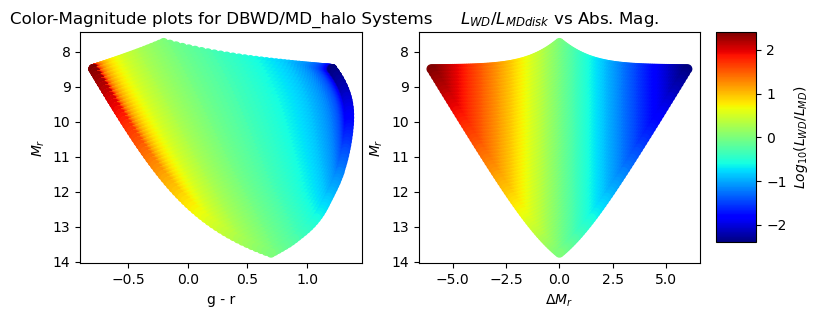

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))

im = ax[0].scatter(DBh_gr, DBh_Mr, c=np.log10(DBh_rfratio), 
                       cmap=cmap)
ax[0].set_xlabel('g - r')
ax[0].set_ylabel('$M_{r}$')
ax[0].invert_yaxis()
ax[0].set_title('Color-Magnitude plots for DBWD/MD_halo Systems')
 
im = ax[1].scatter(DBh_deltaMr, DBh_Mr, c=np.log10(DBh_rfratio), 
                       cmap=cmap)
ax[1].set_xlabel('$\Delta$$M_{r}$')
ax[1].set_ylabel('$M_{r}$')
ax[1].invert_yaxis()
ax[1].set_title('$L_{WD}$/$L_{MDdisk}$ vs Abs. Mag.')
 
cbar_ax = fig.add_axes([0.92, 0.18, 0.05, 0.7])
plt.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$)')


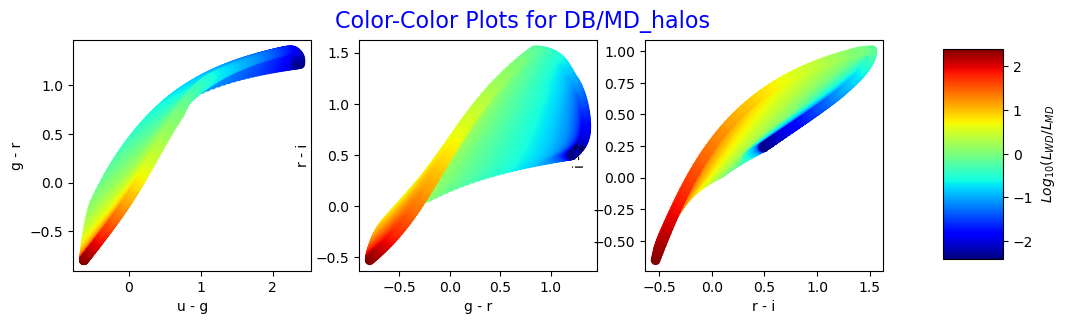

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

im = ax[0].scatter(DBh_ug, DBh_gr, c=np.log10(DBh_rfratio), 
                       cmap=cmap)
ax[0].set_xlabel('u - g')
ax[0].set_ylabel('g - r')

im = ax[1].scatter(DBh_gr, DBh_ri, c=np.log10(DBh_rfratio), 
                       cmap=cmap)
ax[1].set_xlabel('g - r')
ax[1].set_ylabel('r - i')

im = ax[2].scatter(DBh_ri, DBh_iz, c=np.log10(DBh_rfratio), 
                       cmap=cmap)
ax[2].set_xlabel('r - i')
ax[2].set_ylabel('i - z')
    
fig.suptitle('Color-Color Plots for DB/MD_halos', fontsize=16, color='blue')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


In [21]:
df_WDMD2['DBh_rfratio'] = DBh_rfratio
df_WDMD2['DBh_Mr'] = DBh_Mr
df_WDMD2['DBh_ug'] = DBh_ug
df_WDMD2['DBh_gr'] = DBh_gr
df_WDMD2['DBh_ri'] = DBh_ri
df_WDMD2['DBh_iz'] = DBh_iz
df_WDMD2['DBh_deltaMr'] = DBh_deltaMr
del DBh_rfratio
del DBh_Mr
del DBh_ug
del DBh_gr
del DBh_ri
del DBh_iz
del DBh_deltaMr

### IVd. Calculate $M_{r}$ and Colors for a DB/MD Disk Binary System.

In [22]:
# DA White Dwarfs in the disk:
DBd_rfratio = []
DBd_Mr = []
DBd_ug = []
DBd_gr = []
DBd_ri = []
DBd_iz = []
DBd_deltaMr = []
for i in r_index:
    for j in r_index:
        DBd_uflux = df_WDMD['DB_uflux'][i] + df_WDMD['Md_uflux'][j]
        DBd_gflux = df_WDMD['DB_gflux'][i] + df_WDMD['Md_gflux'][j]
        DBd_rflux = df_WDMD['DB_rflux'][i] + df_WDMD['Md_rflux'][j]
        DBd_iflux = df_WDMD['DB_iflux'][i] + df_WDMD['Md_iflux'][j]
        DBd_zflux = df_WDMD['DB_zflux'][i] + df_WDMD['Md_zflux'][j]
        DBd_rfratio.append(df_WDMD['DB_rflux'][i] / df_WDMD['Md_rflux'][j])
        DBd_Mu = -2.5 * np.log10(DBd_uflux) + 31.4
        DBd_Mg = -2.5 * np.log10(DBd_gflux) + 31.4
        DBd_Mi = -2.5 * np.log10(DBd_iflux) + 31.4
        DBd_Mz = -2.5 * np.log10(DBd_zflux) + 31.4
        DBd_Mr_temp = (-2.5 * np.log10(DBd_rflux) + 31.4)
        DBd_Mr.append(DBd_Mr_temp)
        DBd_ug.append(DBd_Mu - DBd_Mg)
        DBd_gr.append(DBd_Mg - DBd_Mr_temp)
        DBd_ri.append(DBd_Mr_temp - DBd_Mi)
        DBd_iz.append(DBd_Mi - DBd_Mz)
        DBd_deltaMr.append(df_WDMD['Mr'][i] - df_WDMD['Mr'][j])


Text(0.5, 1.0, '$L_{WD}$/$L_{MDhalo}$ vs Abs. Mag.')

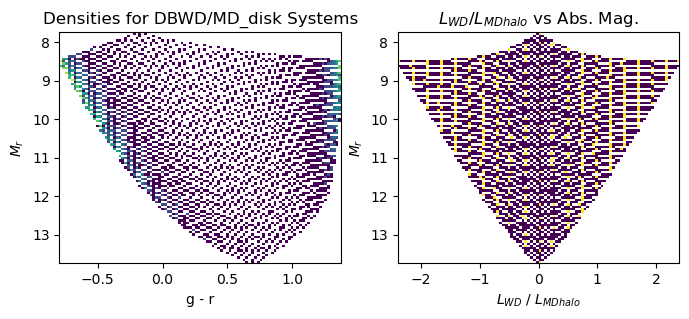

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))
ax[0].hist2d(DBd_gr, DBd_Mr, bins=100, norm='log')
ax[0].set_xlabel('g - r')
ax[0].set_ylabel('$M_{r}$')
ax[0].invert_yaxis()
ax[0].set_title('Densities for DBWD/MD_disk Systems')

ax[1].hist2d(np.log10(DBd_rfratio), DBd_Mr, bins=100, norm='log')
ax[1].set_xlabel('$L_{WD}$ / $L_{MDhalo}$')
ax[1].set_ylabel('$M_{r}$')
ax[1].invert_yaxis()
ax[1].set_title('$L_{WD}$/$L_{MDhalo}$ vs Abs. Mag.')


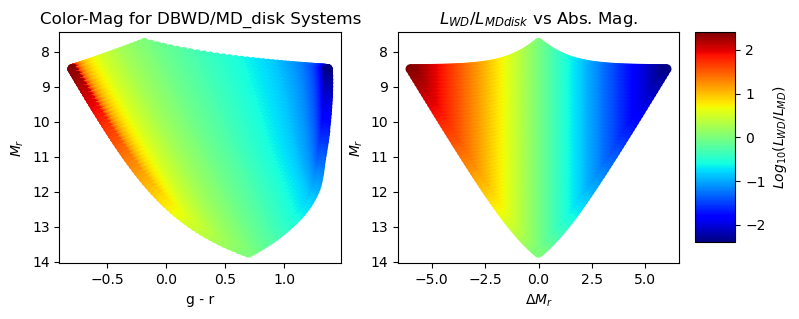

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))

im = ax[0].scatter(DBd_gr, DBd_Mr, c=np.log10(DBd_rfratio), 
                       cmap=cmap)
ax[0].set_xlabel('g - r')
ax[0].set_ylabel('$M_{r}$')
ax[0].invert_yaxis()
ax[0].set_title('Color-Mag for DBWD/MD_disk Systems')
 
im = ax[1].scatter(DBd_deltaMr, DBd_Mr, c=np.log10(DBd_rfratio), 
                       cmap=cmap)
ax[1].set_xlabel('$\Delta$$M_{r}$')
ax[1].set_ylabel('$M_{r}$')
ax[1].invert_yaxis()
ax[1].set_title('$L_{WD}$/$L_{MDdisk}$ vs Abs. Mag.')
 
cbar_ax = fig.add_axes([0.92, 0.18, 0.05, 0.7])
plt.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$)')


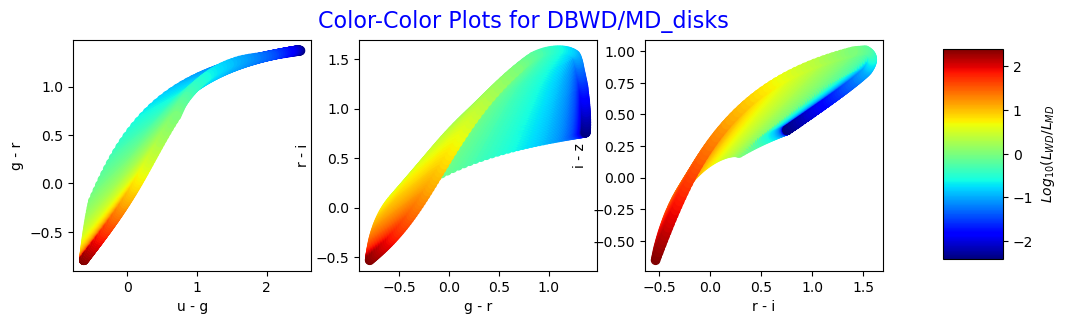

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

im = ax[0].scatter(DBd_ug, DBd_gr, c=np.log10(DBd_rfratio), 
                       cmap=cmap)
ax[0].set_xlabel('u - g')
ax[0].set_ylabel('g - r')

im = ax[1].scatter(DBd_gr, DBd_ri, c=np.log10(DBd_rfratio), 
                       cmap=cmap)
ax[1].set_xlabel('g - r')
ax[1].set_ylabel('r - i')

im = ax[2].scatter(DBd_ri, DBd_iz, c=np.log10(DBd_rfratio), 
                       cmap=cmap)
ax[2].set_xlabel('r - i')
ax[2].set_ylabel('i - z')
    
fig.suptitle('Color-Color Plots for DBWD/MD_disks', fontsize=16, color='blue')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


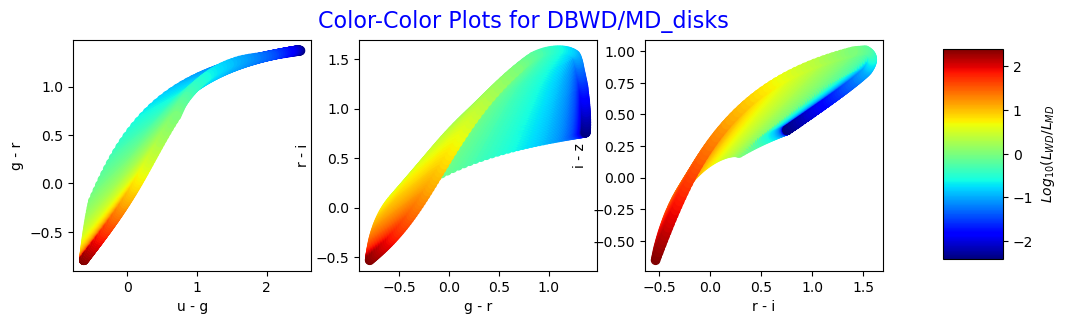

In [51]:
# This is just a more efficient version of the preceding cell.
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

color_labels = [('u - g', 'g - r'), ('g - r', 'r - i'), ('r - i', 'i - z')]
data = [(df_WDMD2['DBd_ug'], df_WDMD2['DBd_gr']), 
        (df_WDMD2['DBd_gr'], df_WDMD2['DBd_ri']), (df_WDMD2['DBd_ri'], df_WDMD2['DBd_iz'])]

for i in range(3):
    im = ax[i].scatter(data[i][0], data[i][1], c=np.log10(df_WDMD2['DBd_rfratio']), cmap=cmap)
    ax[i].set_xlabel(color_labels[i][0])
    ax[i].set_ylabel(color_labels[i][1])

fig.suptitle('Color-Color Plots for DBWD/MD_disks', fontsize=16, color='blue')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')

In [26]:
df_WDMD2['DBd_rfratio'] = DBd_rfratio
df_WDMD2['DBd_Mr'] = DBd_Mr
df_WDMD2['DBd_ug'] = DBd_ug
df_WDMD2['DBd_gr'] = DBd_gr
df_WDMD2['DBd_ri'] = DBd_ri
df_WDMD2['DBd_iz'] = DBd_iz
df_WDMD2['DBd_deltaMr'] = DBd_deltaMr
del DBd_rfratio
del DBd_Mr
del DBd_ug
del DBd_gr
del DBd_ri
del DBd_iz
del DBd_deltaMr

### IVe. Calculate $M_{r}$ and Colors for a DC/MD Halo Binary System.

In [27]:
# DA White Dwarfs in the halo:
DCh_rfratio = []
DCh_Mr = []
DCh_ug = []
DCh_gr = []
DCh_ri = []
DCh_iz = []
DCh_deltaMr = []
for i in r_index:
    for j in r_index:
        DCh_uflux = df_WDMD['DC_uflux'][i] + df_WDMD['Mh_uflux'][j]
        DCh_gflux = df_WDMD['DC_gflux'][i] + df_WDMD['Mh_gflux'][j]
        DCh_rflux = df_WDMD['DC_rflux'][i] + df_WDMD['Mh_rflux'][j]
        DCh_iflux = df_WDMD['DC_iflux'][i] + df_WDMD['Mh_iflux'][j]
        DCh_zflux = df_WDMD['DC_zflux'][i] + df_WDMD['Mh_zflux'][j]
        DCh_rfratio.append(df_WDMD['DC_rflux'][i] / df_WDMD['Mh_rflux'][j])
        DCh_Mu = -2.5 * np.log10(DCh_uflux) + 31.4
        DCh_Mg = -2.5 * np.log10(DCh_gflux) + 31.4
        DCh_Mi = -2.5 * np.log10(DCh_iflux) + 31.4
        DCh_Mz = -2.5 * np.log10(DCh_zflux) + 31.4
        DCh_Mr_temp = (-2.5 * np.log10(DCh_rflux) + 31.4)
        DCh_Mr.append(DCh_Mr_temp)
        DCh_ug.append(DCh_Mu - DCh_Mg)
        DCh_gr.append(DCh_Mg - DCh_Mr_temp)
        DCh_ri.append(DCh_Mr_temp - DCh_Mi)
        DCh_iz.append(DCh_Mi - DCh_Mz)
        DCh_deltaMr.append(df_WDMD['Mr'][i] - df_WDMD['Mr'][j])

Text(0.5, 1.0, '$L_{WD}$/$L_{MDhalo}$ vs Abs. Mag.')

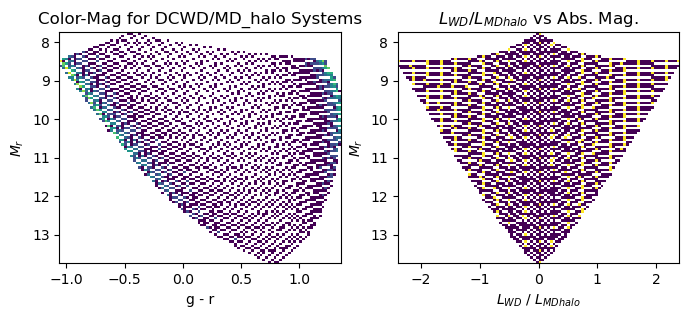

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))
ax[0].hist2d(DCh_gr, DCh_Mr, bins=100, norm='log')
ax[0].set_xlabel('g - r')
ax[0].set_ylabel('$M_{r}$')
ax[0].invert_yaxis()
ax[0].set_title('Color-Mag for DCWD/MD_halo Systems')

ax[1].hist2d(np.log10(DCh_rfratio), DCh_Mr, bins=100, norm='log')
ax[1].set_xlabel('$L_{WD}$ / $L_{MDhalo}$')
ax[1].set_ylabel('$M_{r}$')
ax[1].invert_yaxis()
ax[1].set_title('$L_{WD}$/$L_{MDhalo}$ vs Abs. Mag.')


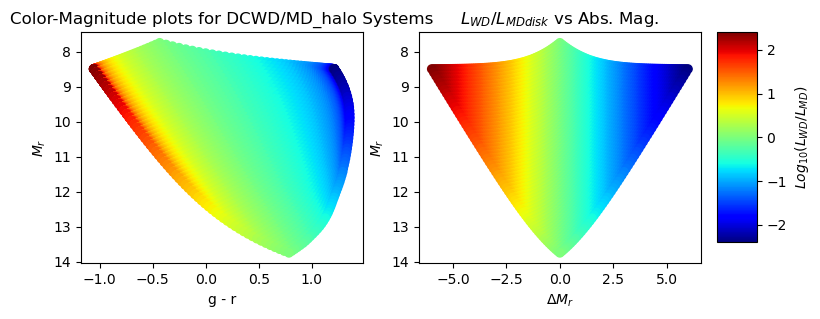

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))

im = ax[0].scatter(DCh_gr, DCh_Mr, c=np.log10(DCh_rfratio), 
                       cmap=cmap)
ax[0].set_xlabel('g - r')
ax[0].set_ylabel('$M_{r}$')
ax[0].invert_yaxis()
ax[0].set_title('Color-Magnitude plots for DCWD/MD_halo Systems')
 
im = ax[1].scatter(DCh_deltaMr, DCh_Mr, c=np.log10(DCh_rfratio), 
                       cmap=cmap)
ax[1].set_xlabel('$\Delta$$M_{r}$')
ax[1].set_ylabel('$M_{r}$')
ax[1].invert_yaxis()
ax[1].set_title('$L_{WD}$/$L_{MDdisk}$ vs Abs. Mag.')
 
cbar_ax = fig.add_axes([0.92, 0.18, 0.05, 0.7])
plt.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$)')


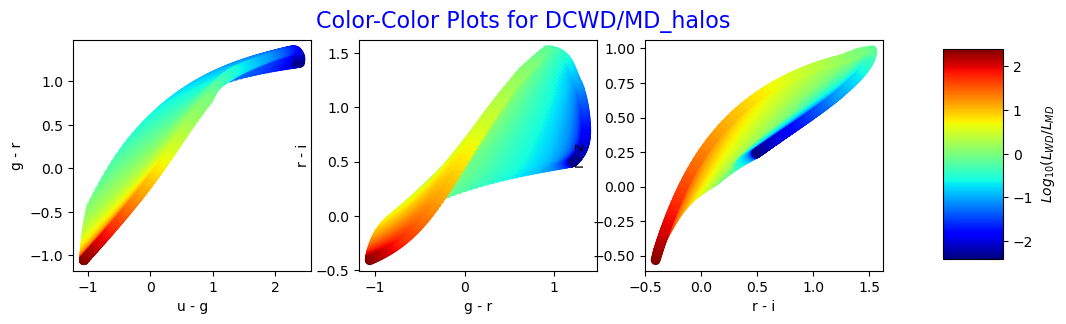

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

im = ax[0].scatter(DCh_ug, DCh_gr, c=np.log10(DCh_rfratio), 
                       cmap=cmap)
ax[0].set_xlabel('u - g')
ax[0].set_ylabel('g - r')

im = ax[1].scatter(DCh_gr, DCh_ri, c=np.log10(DCh_rfratio), 
                       cmap=cmap)
ax[1].set_xlabel('g - r')
ax[1].set_ylabel('r - i')

im = ax[2].scatter(DCh_ri, DCh_iz, c=np.log10(DCh_rfratio), 
                       cmap=cmap)
ax[2].set_xlabel('r - i')
ax[2].set_ylabel('i - z')
    
fig.suptitle('Color-Color Plots for DCWD/MD_halos', fontsize=16, color='blue')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


In [31]:
df_WDMD2['DCh_rfratio'] = DCh_rfratio
df_WDMD2['DCh_Mr'] = DCh_Mr
df_WDMD2['DCh_ug'] = DCh_ug
df_WDMD2['DCh_gr'] = DCh_gr
df_WDMD2['DCh_ri'] = DCh_ri
df_WDMD2['DCh_iz'] = DCh_iz
df_WDMD2['DCh_deltaMr'] = DCh_deltaMr
del DCh_rfratio
del DCh_Mr
del DCh_ug
del DCh_gr
del DCh_ri
del DCh_iz
del DCh_deltaMr

### IVf. Calculate $M_{r}$ and Colors for a DC/MD Disk Binary System.

In [32]:
# DA White Dwarfs in the halo:
DCd_rfratio = []
DCd_Mr = []
DCd_ug = []
DCd_gr = []
DCd_ri = []
DCd_iz = []
DCd_deltaMr = []
for i in r_index:
    for j in r_index:
        DCd_uflux = df_WDMD['DC_uflux'][i] + df_WDMD['Md_uflux'][j]
        DCd_gflux = df_WDMD['DC_gflux'][i] + df_WDMD['Md_gflux'][j]
        DCd_rflux = df_WDMD['DC_rflux'][i] + df_WDMD['Md_rflux'][j]
        DCd_iflux = df_WDMD['DC_iflux'][i] + df_WDMD['Md_iflux'][j]
        DCd_zflux = df_WDMD['DC_zflux'][i] + df_WDMD['Md_zflux'][j]
        DCd_rfratio.append(df_WDMD['DC_rflux'][i] / df_WDMD['Md_rflux'][j])
        DCd_Mu = -2.5 * np.log10(DCd_uflux) + 31.4
        DCd_Mg = -2.5 * np.log10(DCd_gflux) + 31.4
        DCd_Mi = -2.5 * np.log10(DCd_iflux) + 31.4
        DCd_Mz = -2.5 * np.log10(DCd_zflux) + 31.4
        DCd_Mr_temp = (-2.5 * np.log10(DCd_rflux) + 31.4)
        DCd_Mr.append(DCd_Mr_temp)
        DCd_ug.append(DCd_Mu - DCd_Mg)
        DCd_gr.append(DCd_Mg - DCd_Mr_temp)
        DCd_ri.append(DCd_Mr_temp - DCd_Mi)
        DCd_iz.append(DCd_Mi - DCd_Mz)
        DCd_deltaMr.append(df_WDMD['Mr'][i] - df_WDMD['Mr'][j])

Text(0.5, 1.0, '$L_{WD}$/$L_{MDhalo}$ vs Abs. Mag.')

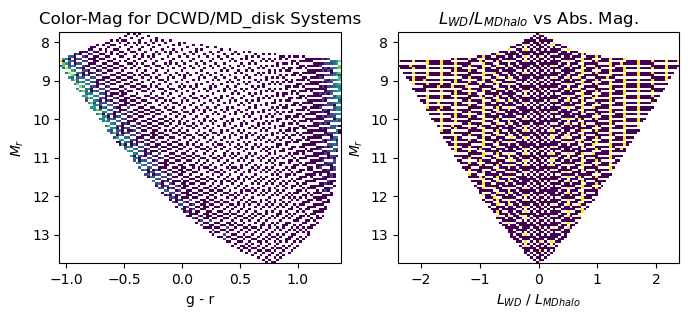

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))
ax[0].hist2d(DCd_gr, DCd_Mr, bins=100, norm='log')
ax[0].set_xlabel('g - r')
ax[0].set_ylabel('$M_{r}$')
ax[0].invert_yaxis()
ax[0].set_title('Color-Mag for DCWD/MD_disk Systems')

ax[1].hist2d(np.log10(DCd_rfratio), DCd_Mr, bins=100, norm='log')
ax[1].set_xlabel('$L_{WD}$ / $L_{MDhalo}$')
ax[1].set_ylabel('$M_{r}$')
ax[1].invert_yaxis()
ax[1].set_title('$L_{WD}$/$L_{MDhalo}$ vs Abs. Mag.')


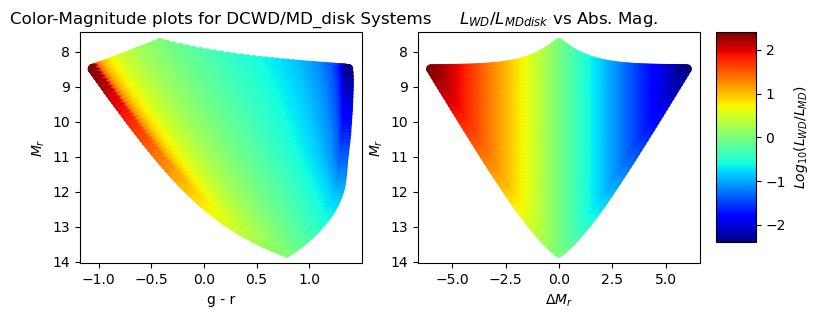

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))

im = ax[0].scatter(DCd_gr, DCd_Mr, c=np.log10(DCd_rfratio), 
                       cmap=cmap)
ax[0].set_xlabel('g - r')
ax[0].set_ylabel('$M_{r}$')
ax[0].invert_yaxis()
ax[0].set_title('Color-Magnitude plots for DCWD/MD_disk Systems')
 
im = ax[1].scatter(DCd_deltaMr, DCd_Mr, c=np.log10(DCd_rfratio), 
                       cmap=cmap)
ax[1].set_xlabel('$\Delta$$M_{r}$')
ax[1].set_ylabel('$M_{r}$')
ax[1].invert_yaxis()
ax[1].set_title('$L_{WD}$/$L_{MDdisk}$ vs Abs. Mag.')
 
cbar_ax = fig.add_axes([0.92, 0.18, 0.05, 0.7])
plt.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$)')


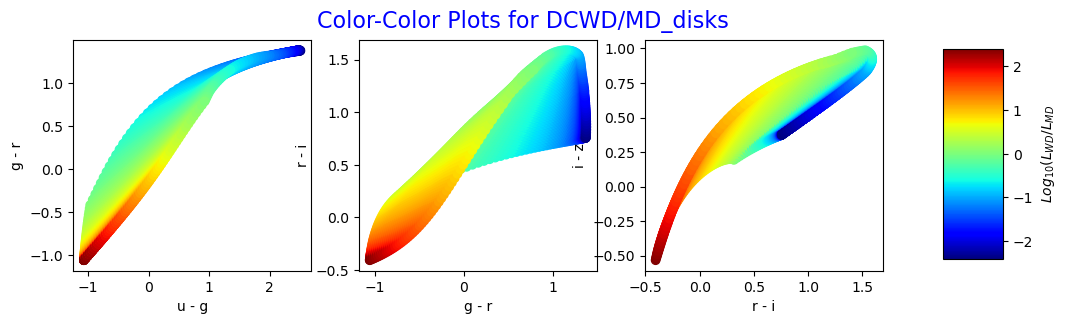

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

im = ax[0].scatter(DCd_ug, DCd_gr, c=np.log10(DCd_rfratio), 
                       cmap=cmap)
ax[0].set_xlabel('u - g')
ax[0].set_ylabel('g - r')

im = ax[1].scatter(DCd_gr, DCd_ri, c=np.log10(DCd_rfratio), 
                       cmap=cmap)
ax[1].set_xlabel('g - r')
ax[1].set_ylabel('r - i')

im = ax[2].scatter(DCd_ri, DCd_iz, c=np.log10(DCd_rfratio), 
                       cmap=cmap)
ax[2].set_xlabel('r - i')
ax[2].set_ylabel('i - z')
    
fig.suptitle('Color-Color Plots for DCWD/MD_disks', fontsize=16, color='blue')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


In [36]:
df_WDMD2['DCd_rfratio'] = DCd_rfratio
df_WDMD2['DCd_Mr'] = DCd_Mr
df_WDMD2['DCd_ug'] = DCd_ug
df_WDMD2['DCd_gr'] = DCd_gr
df_WDMD2['DCd_ri'] = DCd_ri
df_WDMD2['DCd_iz'] = DCd_iz
df_WDMD2['DCd_deltaMr'] = DCd_deltaMr
del DCd_rfratio
del DCd_Mr
del DCd_ug
del DCd_gr
del DCd_ri
del DCd_iz
del DCd_deltaMr

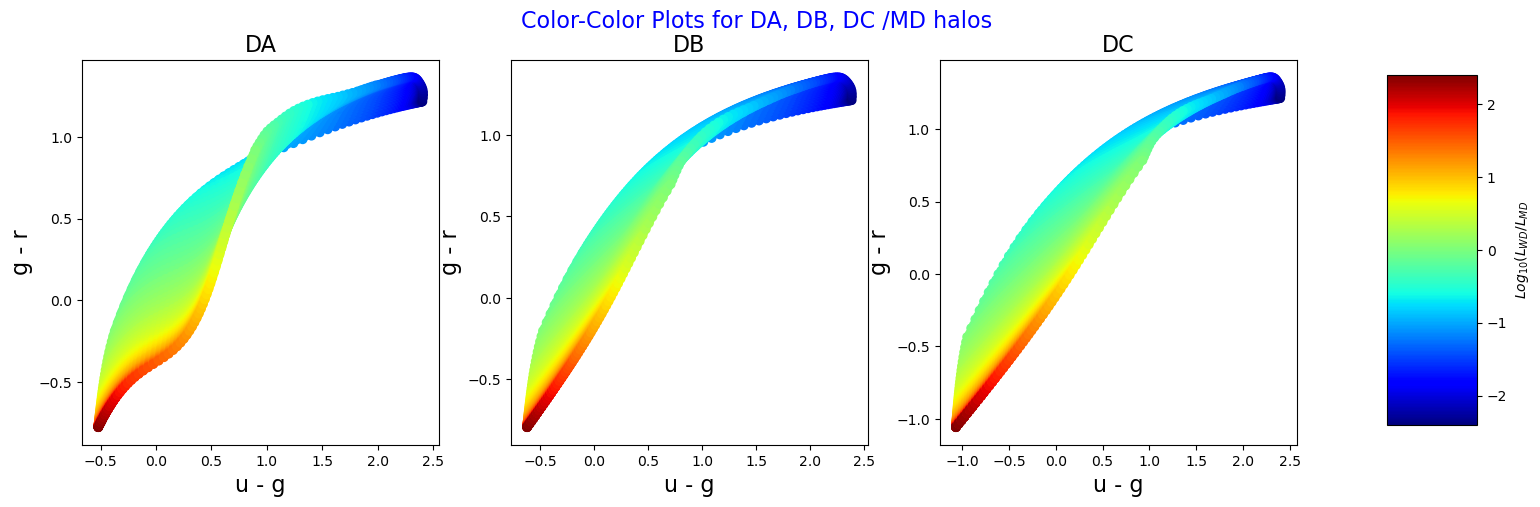

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
WD = ['DA', 'DB', 'DC']

for i in range(len(ax)):
    ax[i].set_xlabel('u - g', fontsize=16)
    ax[i].set_ylabel('g - r', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WDMD2['DAh_ug'], df_WDMD2['DAh_gr'], c=np.log10(df_WDMD2['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBh_ug'], df_WDMD2['DBh_gr'], c=np.log10(df_WDMD2['DBh_rfratio']), 
                       cmap=cmap)
im = ax[2].scatter(df_WDMD2['DCh_ug'], df_WDMD2['DCh_gr'], c=np.log10(df_WDMD2['DCh_rfratio']), 
                       cmap=cmap)

fig.suptitle('Color-Color Plots for DA, DB, DC /MD halos', fontsize=16, color='blue')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


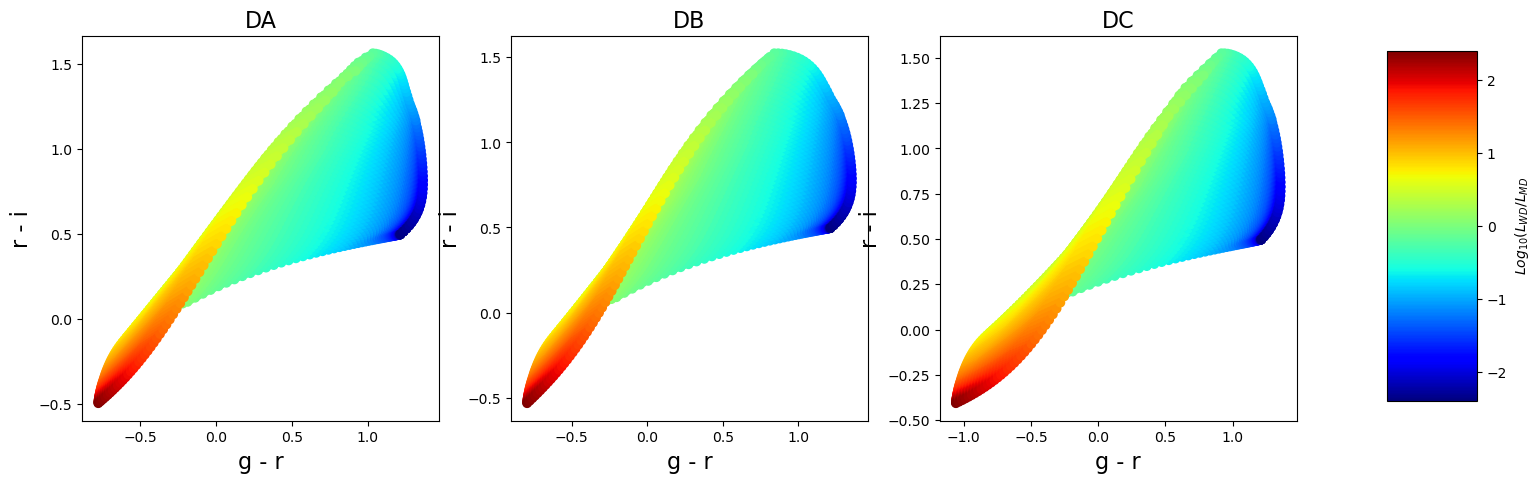

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
WD = ['DA', 'DB', 'DC']

for i in range(len(ax)):
    ax[i].set_xlabel('g - r', fontsize=16)
    ax[i].set_ylabel('r - i', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WDMD2['DAh_gr'], df_WDMD2['DAh_ri'], c=np.log10(df_WDMD2['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBh_gr'], df_WDMD2['DBh_ri'], c=np.log10(df_WDMD2['DBh_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCh_gr'], df_WDMD2['DCh_ri'], c=np.log10(df_WDMD2['DCh_rfratio']), 
                       cmap=cmap, label='DC')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


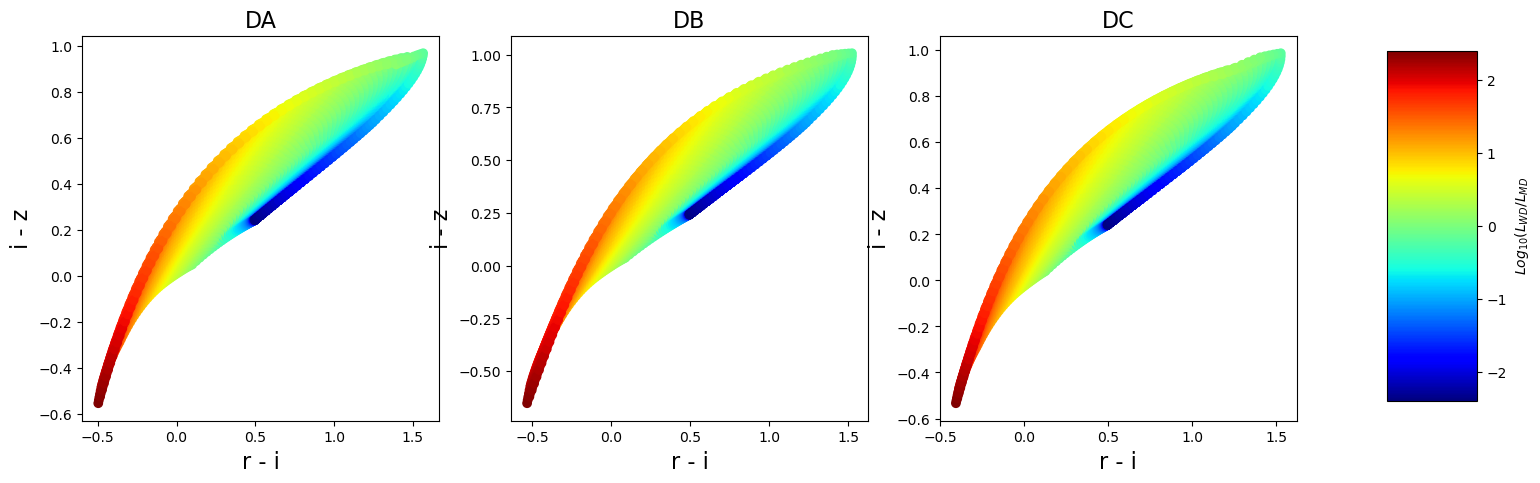

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
WD = ['DA', 'DB', 'DC']

for i in range(len(ax)):
    ax[i].set_xlabel('r - i', fontsize=16)
    ax[i].set_ylabel('i - z', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WDMD2['DAh_ri'], df_WDMD2['DAh_iz'], c=np.log10(df_WDMD2['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBh_ri'], df_WDMD2['DBh_iz'], c=np.log10(df_WDMD2['DBh_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCh_ri'], df_WDMD2['DCh_iz'], c=np.log10(df_WDMD2['DCh_rfratio']), 
                       cmap=cmap, label='DC')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


### V. Compare Colors for Each Type of Binary System

In each case, u-g and g-r colors show the most variation between the DA, DB and DC white dwarf types. There appears to much less difference between halo and disk values for a given WD type and color.

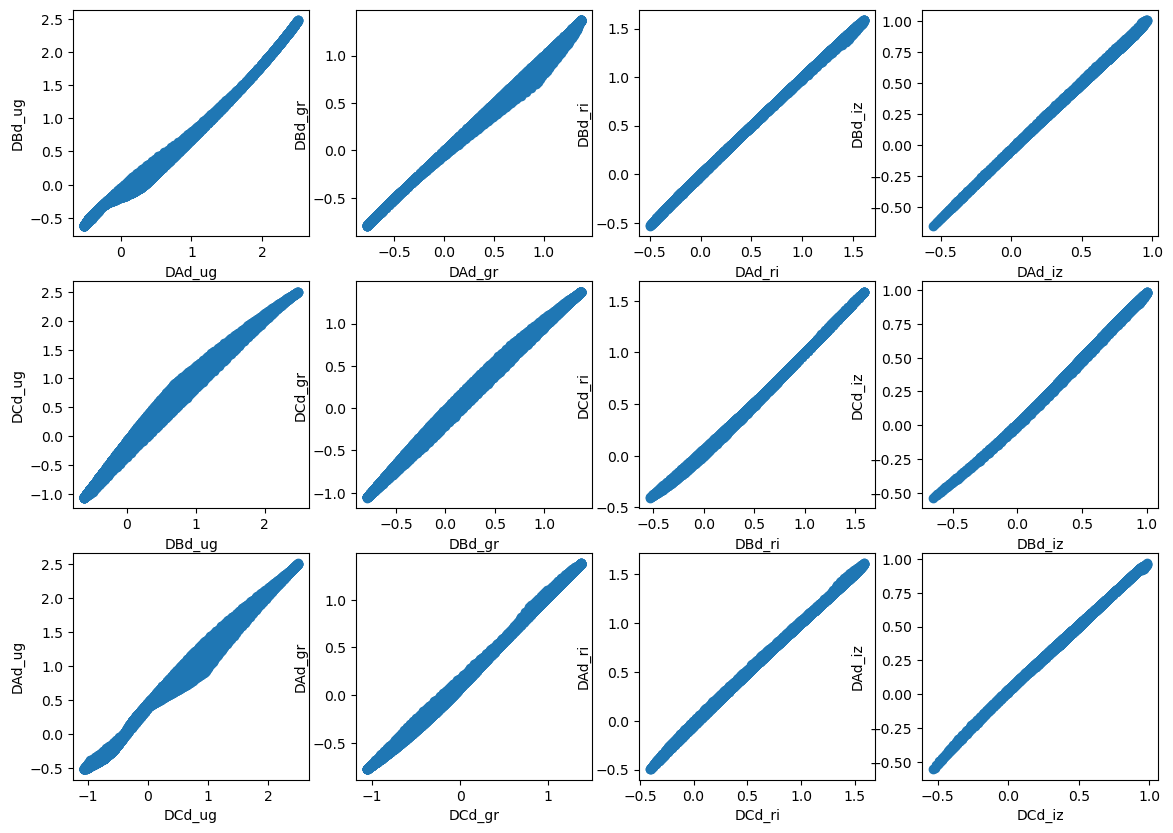

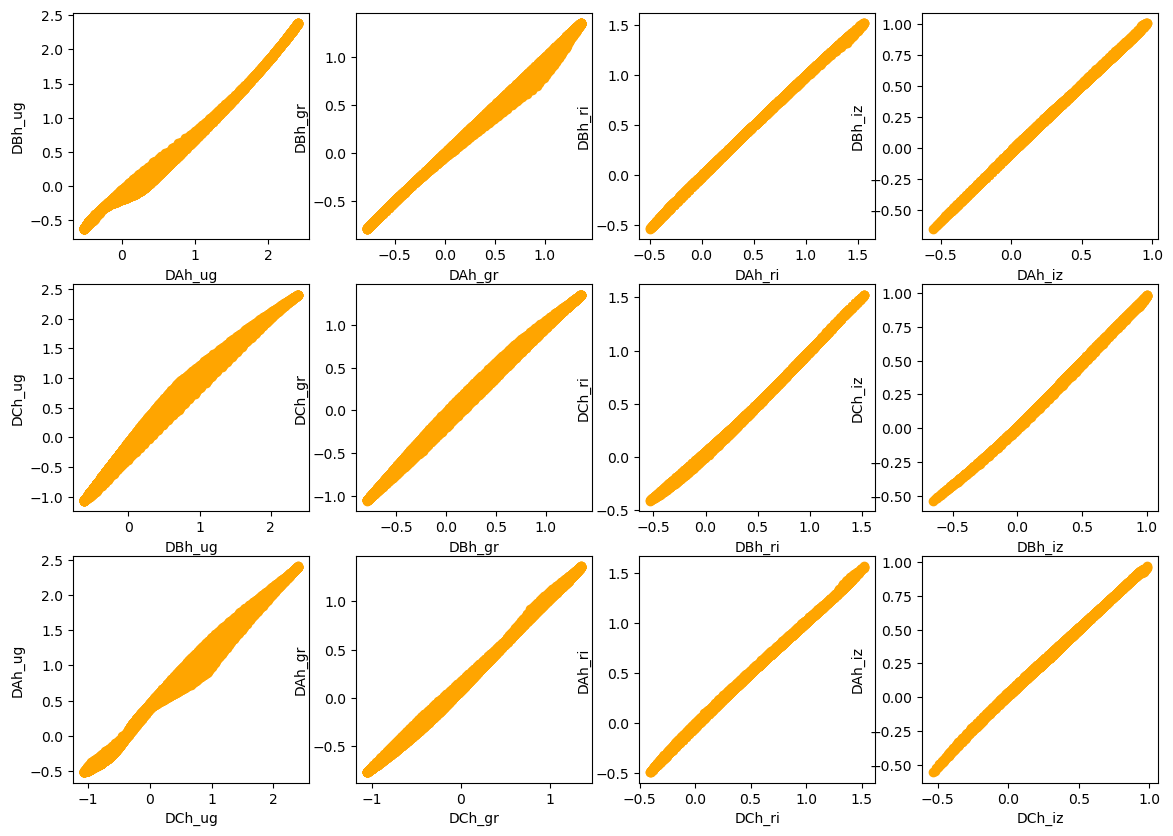

In [40]:
color = ['ug', 'gr', 'ri', 'iz']
WD_type = ['DA', 'DB', 'DC', 'DA']
MD_type = ['d_', 'h_']
label_type = ['/MDdisk', '/MDhalo']


fig, ax = plt.subplots(3, 4, figsize=(14,10))
for i in range(3):
    for j in range(4):
        ax[i,j].scatter(df_WDMD2[WD_type[i] + MD_type[0] + color[j]], df_WDMD2[WD_type[i+1] + MD_type[0] + color[j]])
        ax[i,j].set_xlabel(WD_type[i] + MD_type[0] + color[j])
        ax[i,j].set_ylabel(WD_type[i+1] + MD_type[0] + color[j])

fig, ax = plt.subplots(3, 4, figsize=(14,10))
for i in range(3):
    for j in range(4):
        ax[i,j].scatter(df_WDMD2[WD_type[i] + MD_type[1] + color[j]], df_WDMD2[WD_type[i+1] + MD_type[1] + color[j]], color='orange')
        ax[i,j].set_xlabel(WD_type[i] + MD_type[1] + color[j])
        ax[i,j].set_ylabel(WD_type[i+1] + MD_type[1] + color[j])


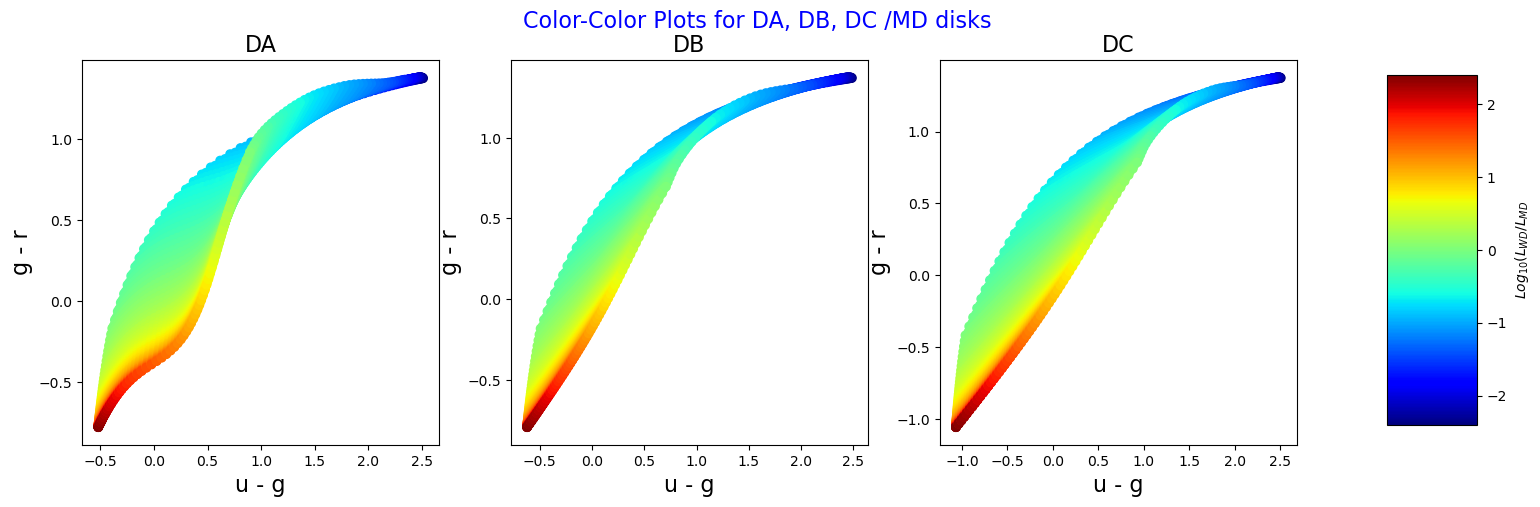

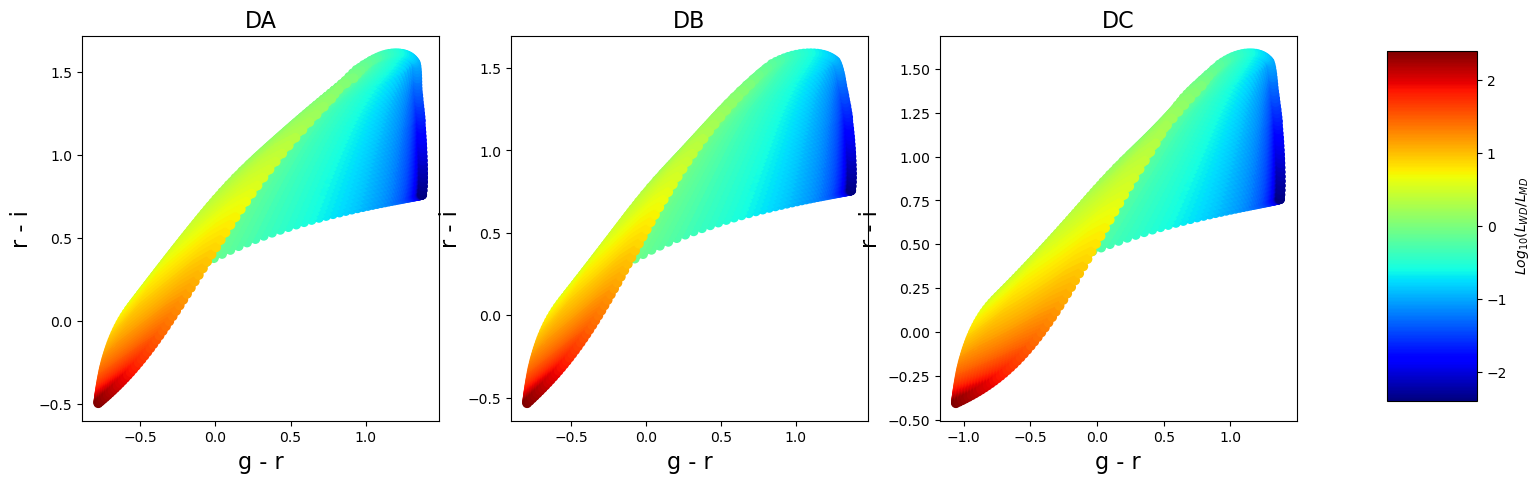

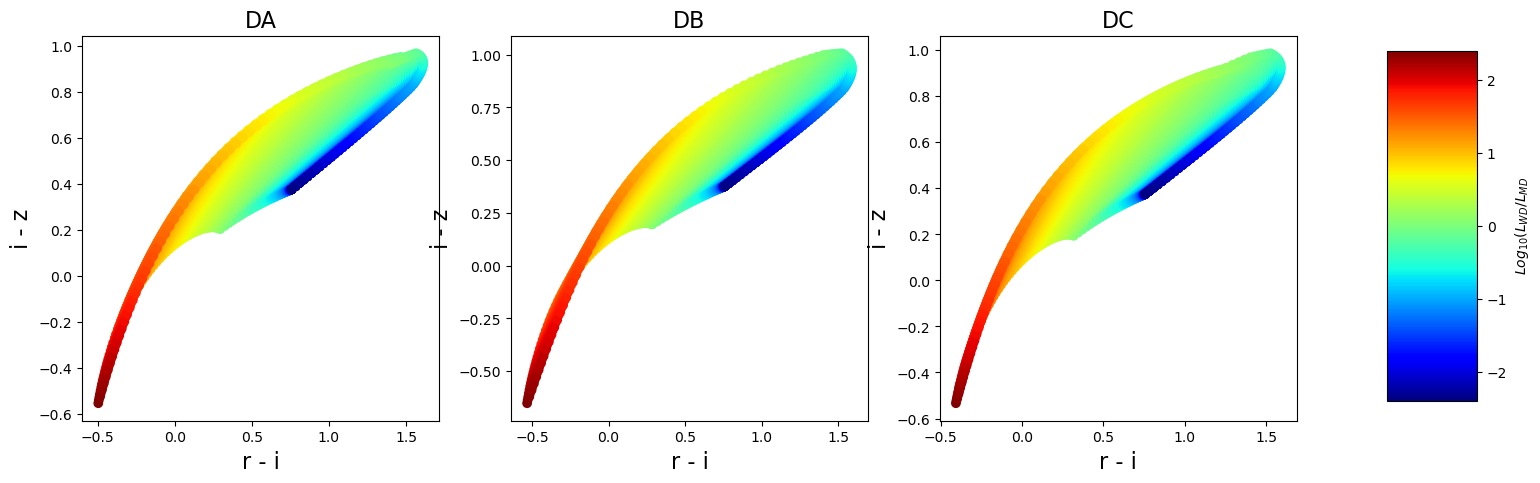

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
WD = ['DA', 'DB', 'DC']

for i in range(len(ax)):
    ax[i].set_xlabel('u - g', fontsize=16)
    ax[i].set_ylabel('g - r', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WDMD2['DAd_ug'], df_WDMD2['DAd_gr'], c=np.log10(df_WDMD2['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBd_ug'], df_WDMD2['DBd_gr'], c=np.log10(df_WDMD2['DBd_rfratio']), 
                       cmap=cmap)
im = ax[2].scatter(df_WDMD2['DCd_ug'], df_WDMD2['DCd_gr'], c=np.log10(df_WDMD2['DCd_rfratio']), 
                       cmap=cmap)

fig.suptitle('Color-Color Plots for DA, DB, DC /MD disks', fontsize=16, color='blue')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')

fig, ax = plt.subplots(1, 3, figsize=(18,5))

for i in range(len(ax)):
    ax[i].set_xlabel('g - r', fontsize=16)
    ax[i].set_ylabel('r - i', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WDMD2['DAd_gr'], df_WDMD2['DAd_ri'], c=np.log10(df_WDMD2['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBd_gr'], df_WDMD2['DBd_ri'], c=np.log10(df_WDMD2['DBd_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCd_gr'], df_WDMD2['DCd_ri'], c=np.log10(df_WDMD2['DCd_rfratio']), 
                       cmap=cmap, label='DC')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')

fig, ax = plt.subplots(1, 3, figsize=(18,5))
WD = ['DA', 'DB', 'DC']

for i in range(len(ax)):
    ax[i].set_xlabel('r - i', fontsize=16)
    ax[i].set_ylabel('i - z', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WDMD2['DAd_ri'], df_WDMD2['DAd_iz'], c=np.log10(df_WDMD2['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBd_ri'], df_WDMD2['DBd_iz'], c=np.log10(df_WDMD2['DBd_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCd_ri'], df_WDMD2['DCd_iz'], c=np.log10(df_WDMD2['DCd_rfratio']), 
                       cmap=cmap, label='DC')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


### VI. Compare Color-Magnitude Plots for Each Type of Binary System

#### Disk Objects

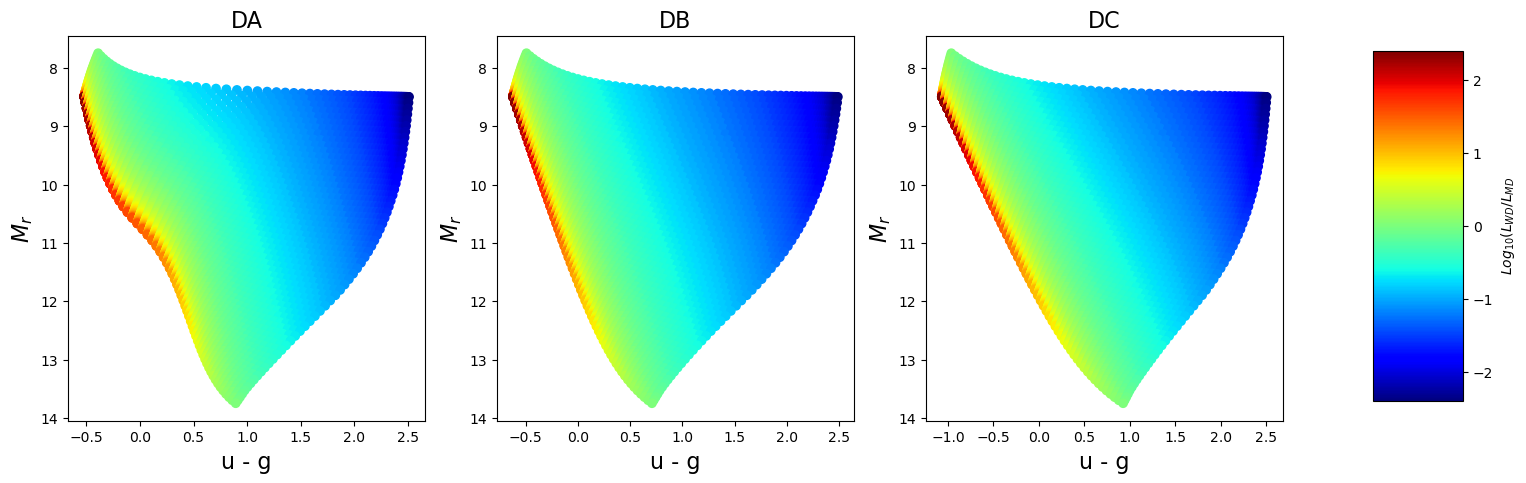

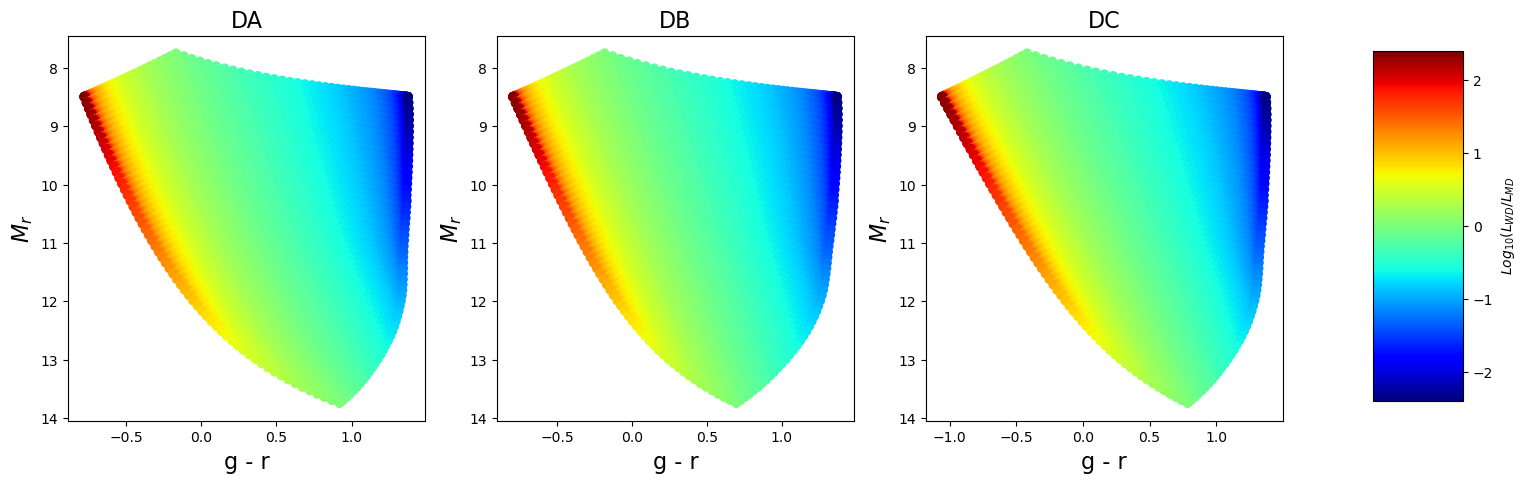

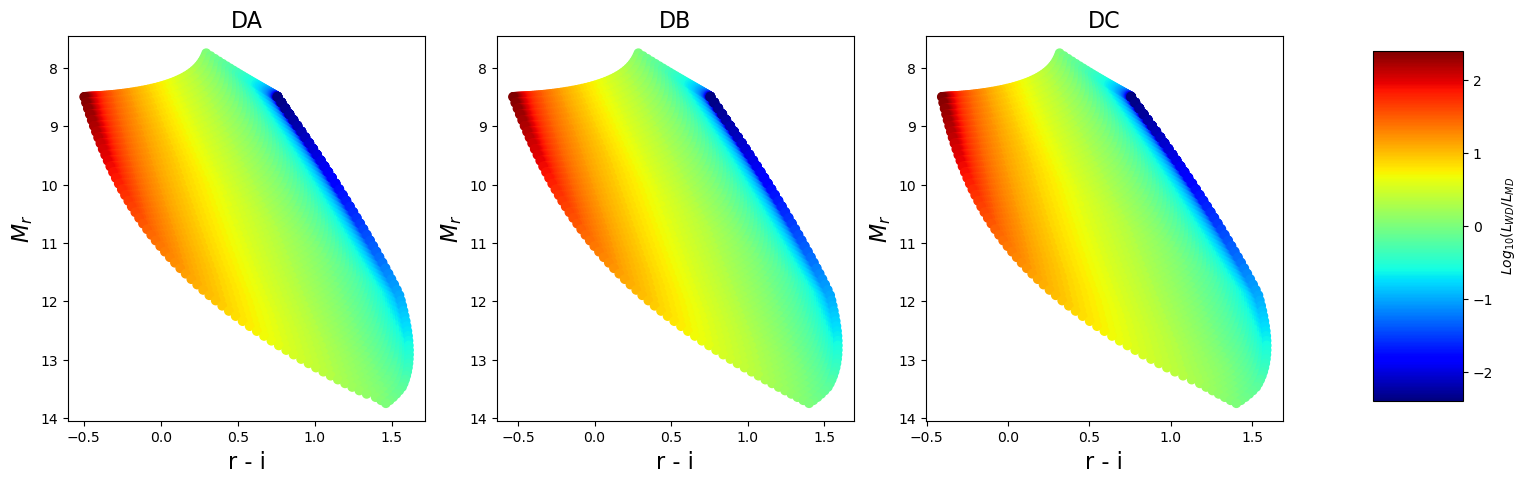

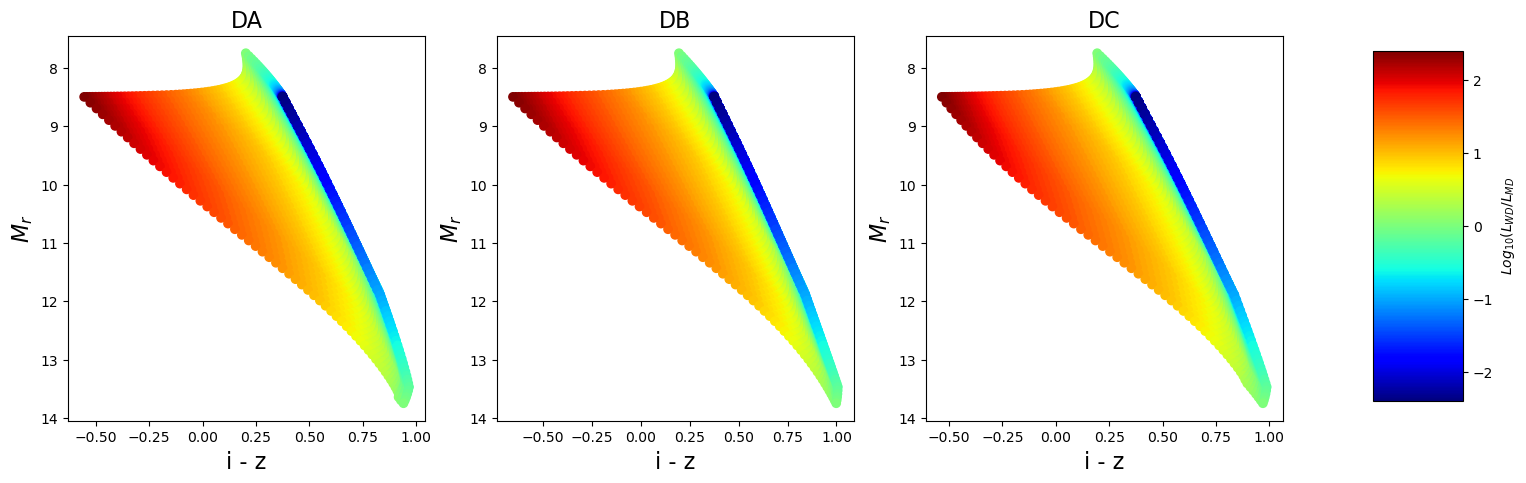

In [42]:
WD = ['DA', 'DB', 'DC']

fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('u - g', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD2['DAd_ug'], df_WDMD2['DAd_Mr'], c=np.log10(df_WDMD2['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBd_ug'], df_WDMD2['DBd_Mr'], c=np.log10(df_WDMD2['DBd_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCd_ug'], df_WDMD2['DCd_Mr'], c=np.log10(df_WDMD2['DCd_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('g - r', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD2['DAd_gr'], df_WDMD2['DAd_Mr'], c=np.log10(df_WDMD2['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBd_gr'], df_WDMD2['DBd_Mr'], c=np.log10(df_WDMD2['DBd_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCd_gr'], df_WDMD2['DCd_Mr'], c=np.log10(df_WDMD2['DCd_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('r - i', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD2['DAd_ri'], df_WDMD2['DAd_Mr'], c=np.log10(df_WDMD2['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBd_ri'], df_WDMD2['DBd_Mr'], c=np.log10(df_WDMD2['DBd_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCd_ri'], df_WDMD2['DCd_Mr'], c=np.log10(df_WDMD2['DCd_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('i - z', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD2['DAd_iz'], df_WDMD2['DAd_Mr'], c=np.log10(df_WDMD2['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBd_iz'], df_WDMD2['DBd_Mr'], c=np.log10(df_WDMD2['DBd_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCd_iz'], df_WDMD2['DCd_Mr'], c=np.log10(df_WDMD2['DCd_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')



#### Halo Objects

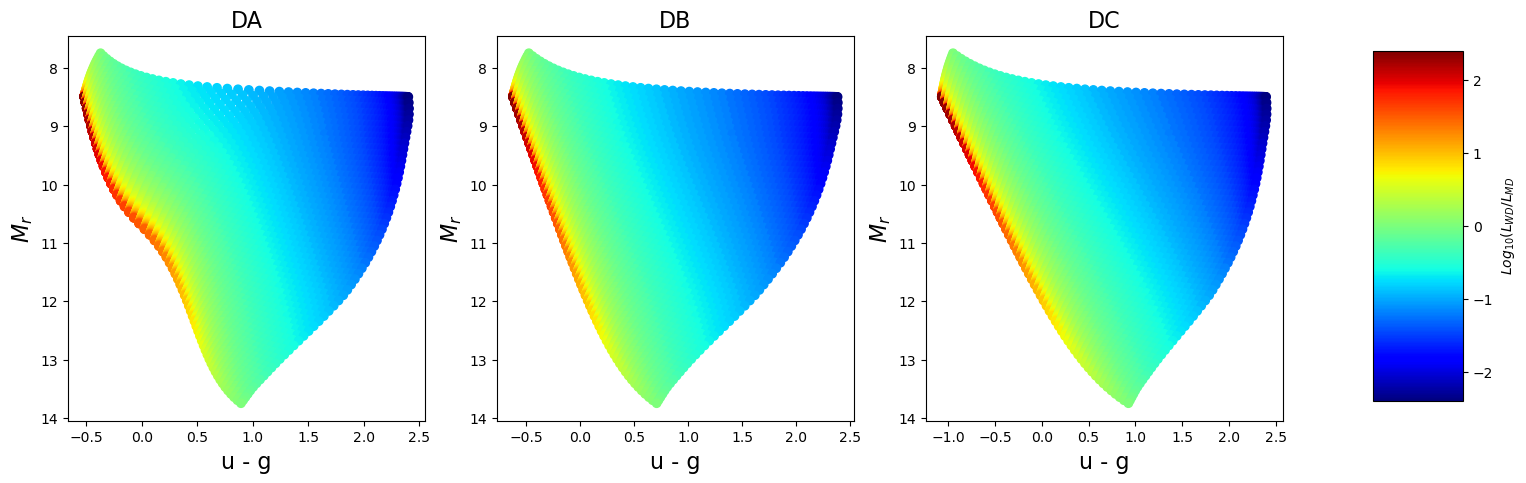

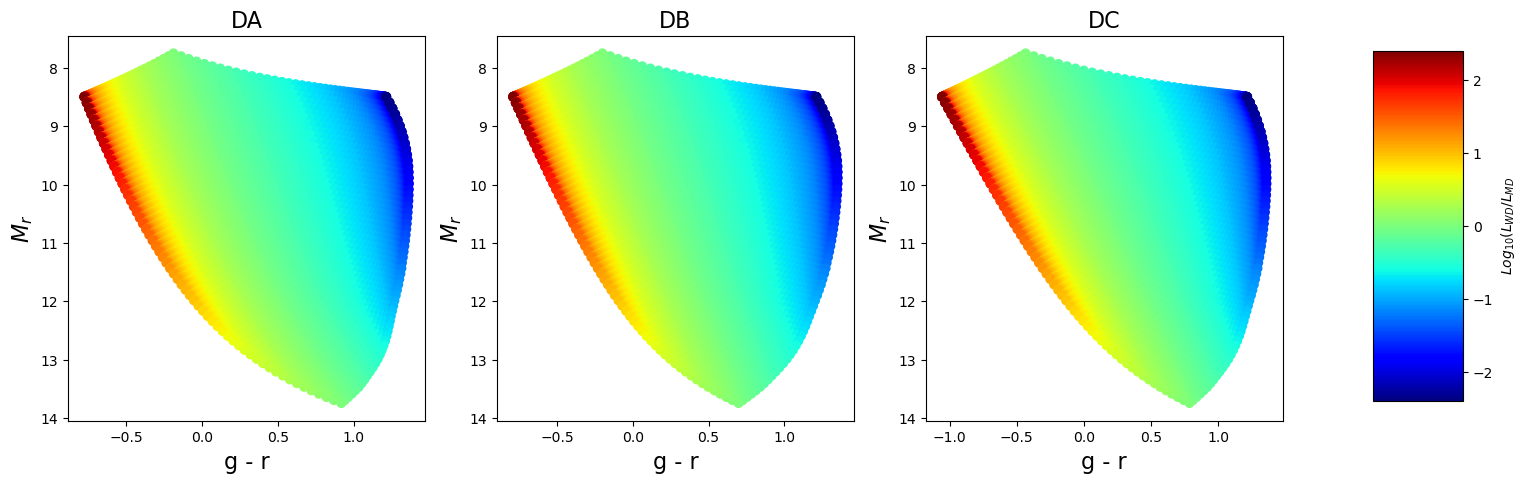

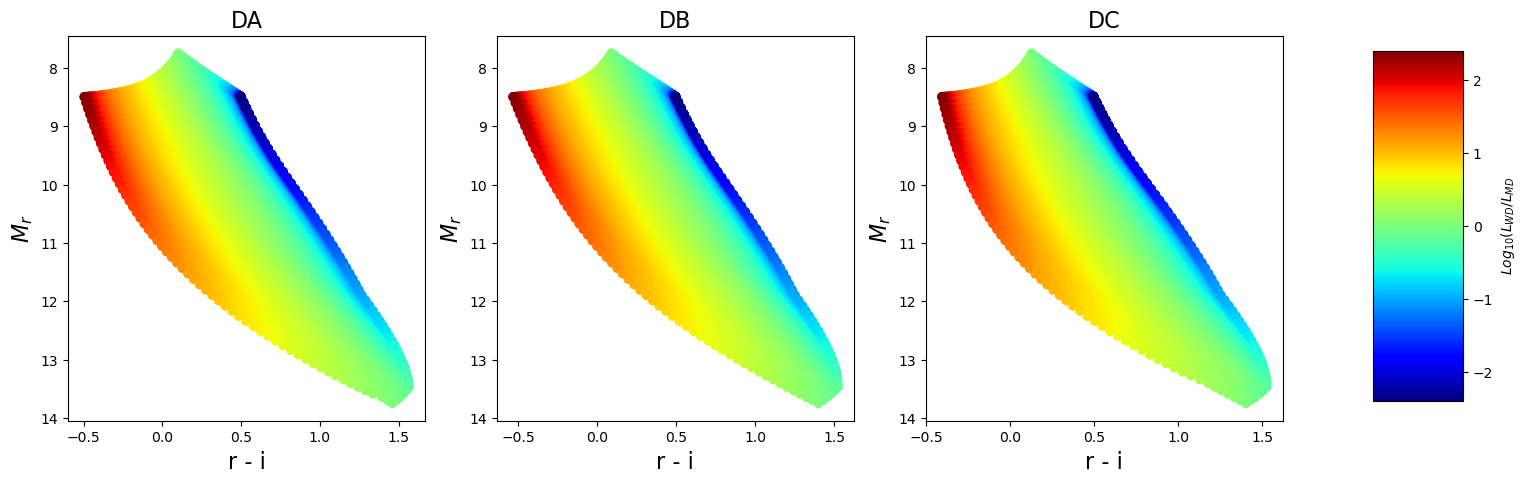

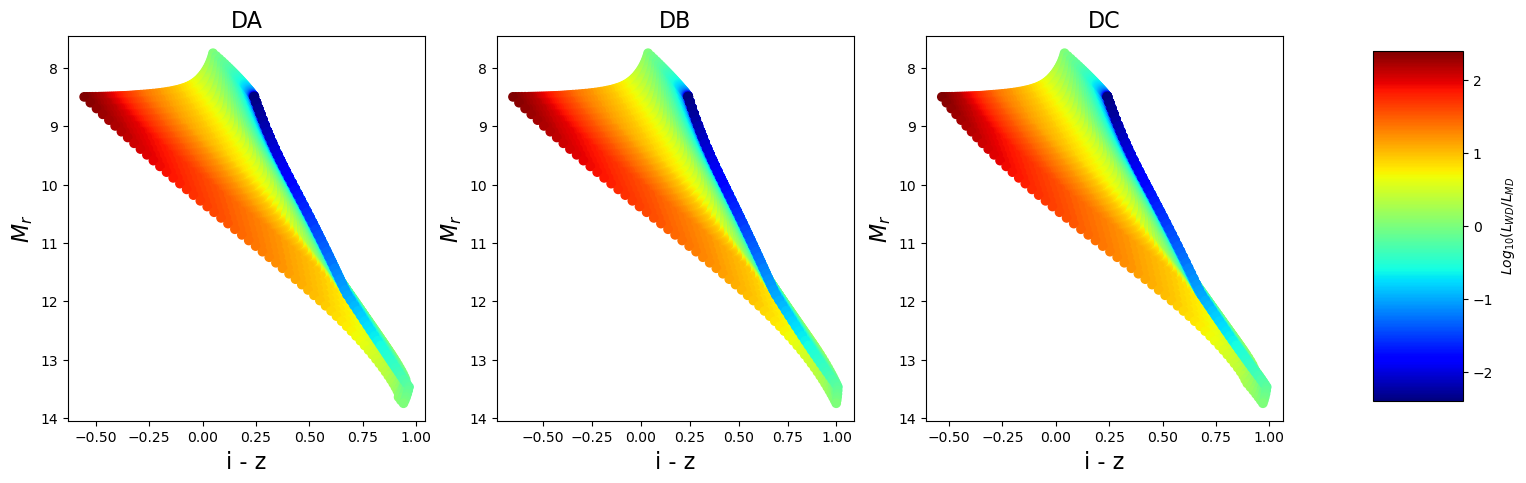

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('u - g', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD2['DAh_ug'], df_WDMD2['DAh_Mr'], c=np.log10(df_WDMD2['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBh_ug'], df_WDMD2['DBh_Mr'], c=np.log10(df_WDMD2['DBh_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCh_ug'], df_WDMD2['DCh_Mr'], c=np.log10(df_WDMD2['DCh_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('g - r', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD2['DAh_gr'], df_WDMD2['DAh_Mr'], c=np.log10(df_WDMD2['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBh_gr'], df_WDMD2['DBh_Mr'], c=np.log10(df_WDMD2['DBh_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCh_gr'], df_WDMD2['DCh_Mr'], c=np.log10(df_WDMD2['DCh_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('r - i', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD2['DAh_ri'], df_WDMD2['DAh_Mr'], c=np.log10(df_WDMD2['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBh_ri'], df_WDMD2['DBh_Mr'], c=np.log10(df_WDMD2['DBh_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCh_ri'], df_WDMD2['DCh_Mr'], c=np.log10(df_WDMD2['DCh_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('i - z', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD2['DAh_iz'], df_WDMD2['DAh_Mr'], c=np.log10(df_WDMD2['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBh_iz'], df_WDMD2['DBh_Mr'], c=np.log10(df_WDMD2['DBh_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCh_iz'], df_WDMD2['DCh_Mr'], c=np.log10(df_WDMD2['DCh_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


### VII. Save df_WDMD2 to WDMD2.csv

In [44]:
df_WDMD2.to_csv('WDMD2.csv', index=False)

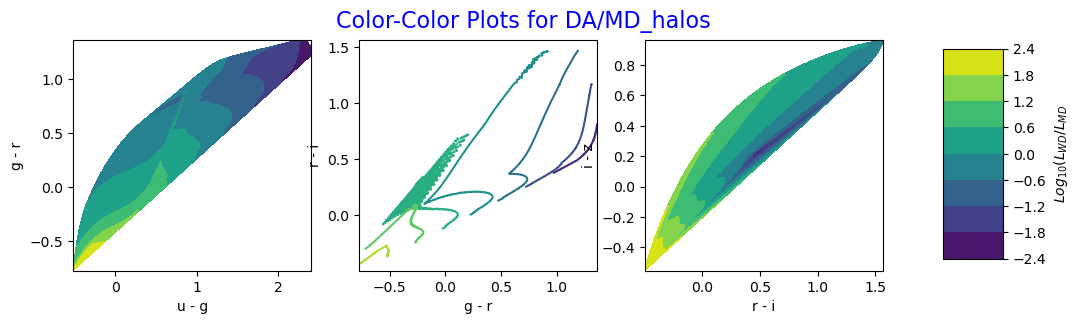

In [45]:
df_temp = pd.DataFrame()
df_temp['DAh_ug'] = df_WDMD2['DAh_ug']
df_temp['DAh_gr'] = df_WDMD2['DAh_gr']
df_temp['DAh_ri'] = df_WDMD2['DAh_ri']
df_temp['DAh_iz'] = df_WDMD2['DAh_iz']
df_temp['DAh_rfratio'] = df_WDMD2['DAh_rfratio']
df_temp = df_temp.sort_values('DAh_rfratio')

fig, ax = plt.subplots(1, 3, figsize=(12,3))

ax[0].tricontourf(df_temp['DAh_ug'], df_temp['DAh_gr'], np.log10(df_temp['DAh_rfratio']))
ax[0].set_xlabel('u - g')
ax[0].set_ylabel('g - r')

ax[1].tricontour(df_temp['DAh_gr'], df_temp['DAh_ri'], np.log10(df_temp['DAh_rfratio']))
ax[1].set_xlabel('g - r')
ax[1].set_ylabel('r - i')

im = ax[2].tricontourf(df_temp['DAh_ri'], df_temp['DAh_iz'], np.log10(df_temp['DAh_rfratio']))
ax[2].set_xlabel('r - i')
ax[2].set_ylabel('i - z')
    
fig.suptitle('Color-Color Plots for DA/MD_halos', fontsize=16, color='blue')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


In [46]:
[X,Y] = np.meshgrid(df_temp['DAh_ug'], df_temp['DAh_gr'])
Z = np.zeros((len(df_temp['DAh_ug']),len(df_temp['DAh_gr'])))
for i in range(len(df_temp['DAh_ug'])):
    for j in range(len(df_temp['DAh_gr'])):
        if i==j:
            Z[i,j] = np.log10(df_temp['DAh_rfratio'])[i]


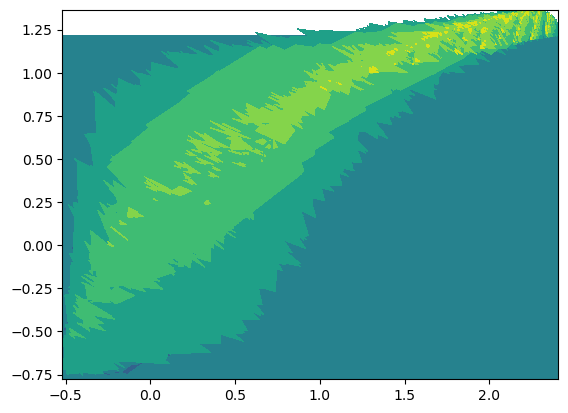

In [47]:
plt.contourf(X,Y,Z)